## Perform clustering (Hierarchical, K-Means, and DBSCAN) for the airlines data to obtain optimum number of clusters. 
### Draw the inferences from the clusters obtained.

The file East West Airlines contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

 #### As this problem comes under Unsupervised Type of Machine Learning where there is 'NO' specific output i.e. NO 'y'

Clustering analysis is an unsupervised learning method that separates the data points into several specific bunches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense.

It comprises of many different methods based on different distance measures. E.g. K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance), etc.

Centrally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on the Density-based spatial clustering of applications with noise (DBSCAN) clustering method.

## 1. Import Necessary Libraries:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Required Libraries for Clustering:

import scipy.cluster.hierarchy as sch
import sklearn.cluster as skc
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics

from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None) # Data display customization
pd.set_option('display.max_colwidth', -1)

# 2. Import data / dataset:

In [3]:
#Import dataset:
flight_data = pd.read_excel("EastWestAirlines.xlsx", 'data')

# Column Rename:
flight_data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
flight_data

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     1     28143    0           1          1          1          174           
1     2     19244    0           1          1          1          215           
2     3     41354    0           1          1          1          4123          
3     4     14776    0           1          1          1          500           
4     5     97752    0           4          1          1          43300         
...  ..       ...   ..          ..         ..         ..            ...         
3994  4017  18476    0           1          1          1          8525          
3995  4018  64385    0           1          1          1          981           
3996  4019  73597    0           3          1          1          25447         
3997  4020  54899    0           1          1          1          500           
3998  4021  3016     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0     1            0                  0                7000                
1     2            0                  0                6968                
2     4            0                  0                7034                
3     1            0                  0                6952                
4     26           2077               4                6935                
...   ..            ...              ..                 ...                
3994  4            200                1                1403                
3995  5            0                  0                1395                
3996  8            0                  0                1402                
3997  1            500                1                1401                
3998  0            0                  0                1398                

      Award  
0     0      
1     0      
2     0      
3     0      
4     1      
...  ..      
3994  1      
3995  1      
3996  1      
3997  0      
3998  0      

[3999 rows x 12 columns]

East-West Airlines is trying to learn more about its customers. Key issues are their flying patterns, earning and use of frequent flyer rewards, and use of the airline credit card. The task is to identify customer segments via clustering. The file EastWestAirlines.xls contains information on 4000 passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar charactersitics for the purpose of targeting different segments for different types of mileage offers.

# 3. Data  Exploration / Understanding / EDA:

In [5]:
flight_data.shape

(3999, 11)

In [6]:
flight_data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [7]:
flight_data.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award                int64
dtype: object

In [8]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [9]:
# Descriptive Statistics:
flight_data.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03  3999.000000   3999.000000  3999.000000  3999.000000   
mean   7.360133e+04  144.114529    2.059515     1.014504     1.012253      
std    1.007757e+05  773.663804    1.376919     0.147650     0.195241      
min    0.000000e+00  0.000000      1.000000     1.000000     1.000000      
25%    1.852750e+04  0.000000      1.000000     1.000000     1.000000      
50%    4.309700e+04  0.000000      1.000000     1.000000     1.000000      
75%    9.240400e+04  0.000000      3.000000     1.000000     1.000000      
max    1.704838e+06  11148.000000  5.000000     3.000000     5.000000      

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  3999.000000    3999.00000   3999.000000        3999.000000       
mean   17144.846212   11.60190     460.055764         1.373593          
std    24150.967826   9.60381      1400.209171        3.793172          
min    0.000000       0.00000      0.000000           0.000000          
25%    1250.000000    3.00000      0.000000           0.000000          
50%    7171.000000    12.00000     0.000000           0.000000          
75%    23800.500000   17.00000     311.000000         1.000000          
max    263685.000000  86.00000     30817.000000       53.000000         

       Days_since_enroll        Award  
count  3999.00000         3999.000000  
mean   4118.55939         0.370343     
std    2065.13454         0.482957     
min    2.00000            0.000000     
25%    2330.00000         0.000000     
50%    4096.00000         0.000000     
75%    5790.50000         1.000000     
max    8296.00000         1.000000

In [10]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take

print('unique_cc1',flight_data.cc1_miles.unique())
print('unique_cc2',flight_data.cc2_miles.unique())
print('unique_cc3',flight_data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


### Creating Histogram:

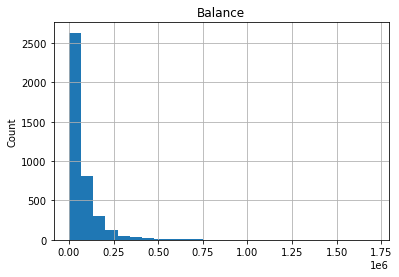

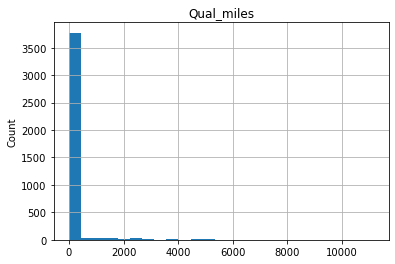

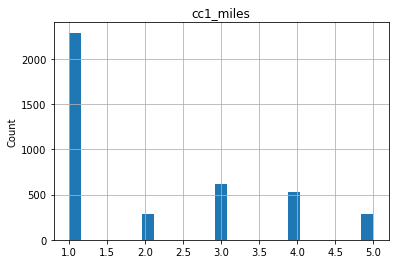

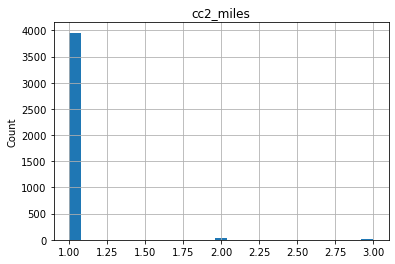

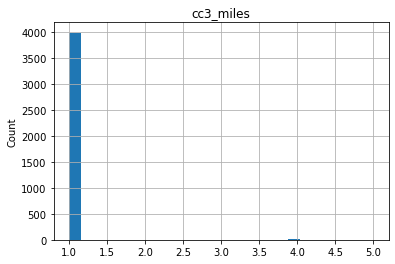

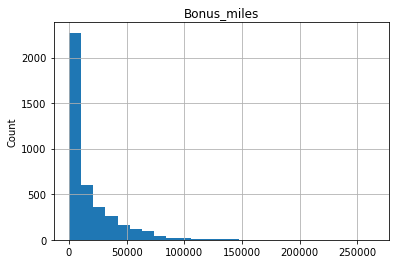

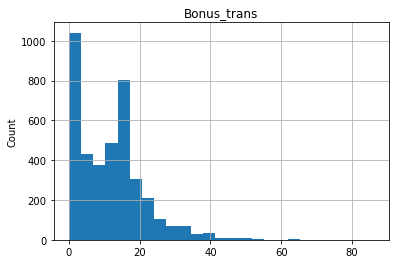

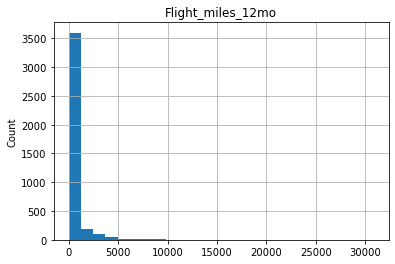

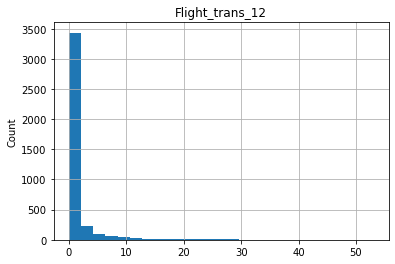

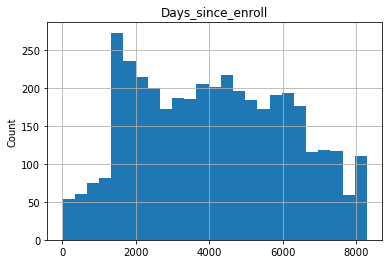

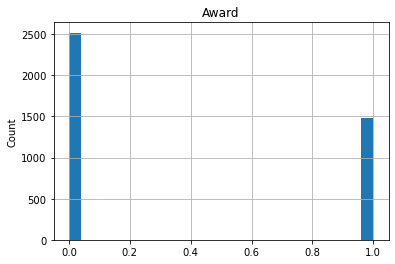

In [11]:
for feature in flight_data.columns:
    data=flight_data.copy()
    flight_data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Balance


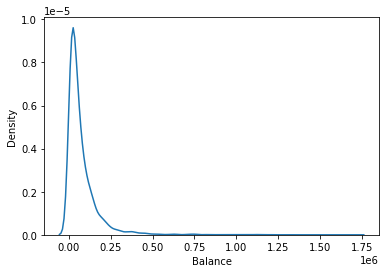

Qual_miles


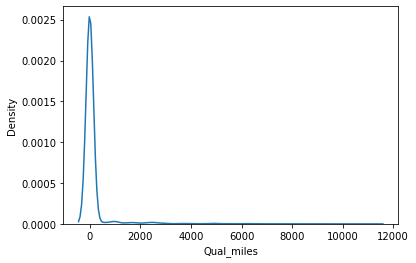

cc1_miles


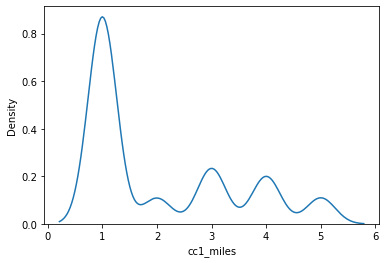

cc2_miles


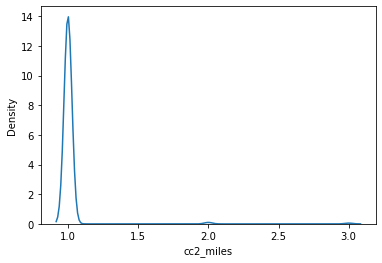

cc3_miles


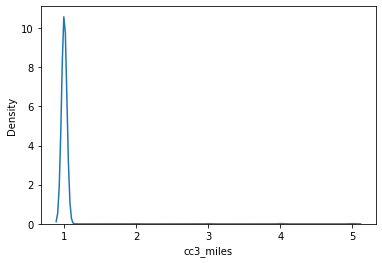

Bonus_miles


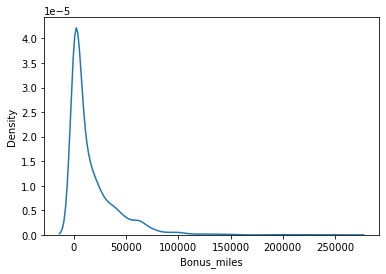

Bonus_trans


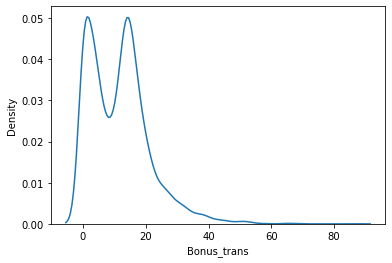

Flight_miles_12mo


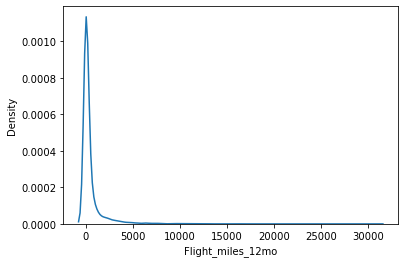

Flight_trans_12


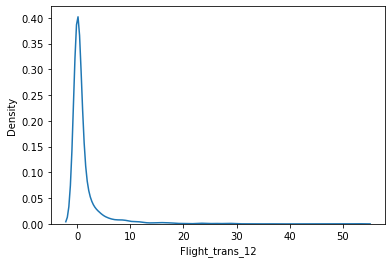

Days_since_enroll


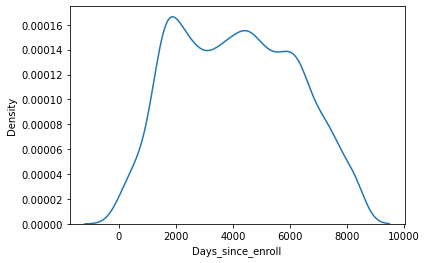

Award


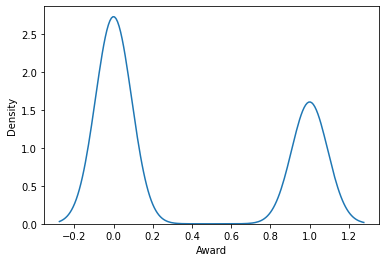

In [12]:
#Kernel Density for every feature, singled out here:

for n in flight_data.columns:
    print(n)
    sns.kdeplot(flight_data[n])
    plt.show()

### Outlier Detection:

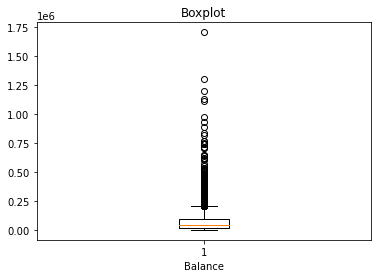

In [19]:
# We now plot the boxplot for the data using each feature independently and check for Outliers

plt.boxplot(flight_data.Balance)
plt.title('Boxplot')
plt.xlabel('Balance')
plt.show()

# In below plot, We can see that Outliers present for "Balance" Feature

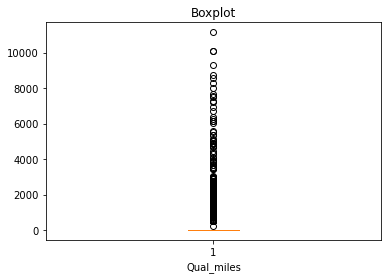

In [20]:
plt.boxplot(flight_data.Qual_miles)    # Outliers present
plt.title('Boxplot')
plt.xlabel('Qual_miles')
plt.show()  

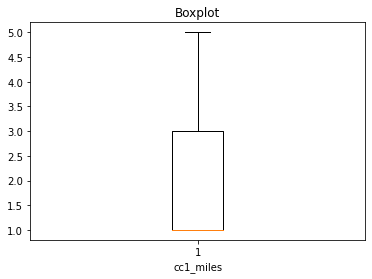

In [21]:
plt.boxplot(flight_data.cc1_miles)    # No outliers present
plt.title('Boxplot')
plt.xlabel('cc1_miles')
plt.show()  

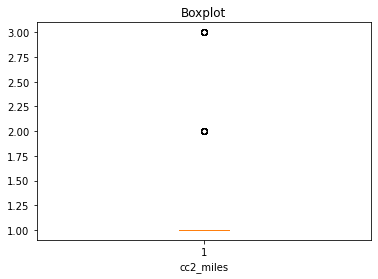

In [22]:
plt.boxplot(flight_data.cc2_miles)            # Outliers present
plt.title('Boxplot')
plt.xlabel('cc2_miles')
plt.show()

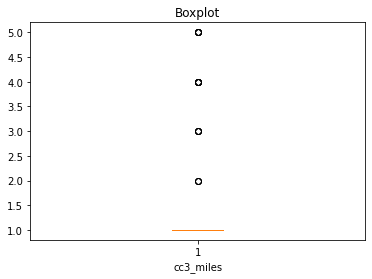

In [23]:
plt.boxplot(flight_data.cc3_miles)                 # Outliers present
plt.title('Boxplot')
plt.xlabel('cc3_miles')
plt.show()

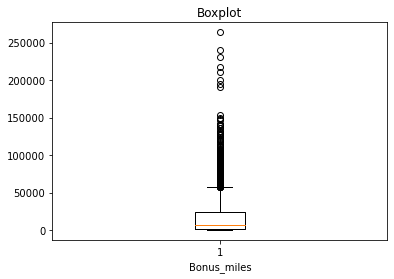

In [24]:
plt.boxplot(flight_data.Bonus_miles)       # Outliers present
plt.title('Boxplot')
plt.xlabel('Bonus_miles')
plt.show()

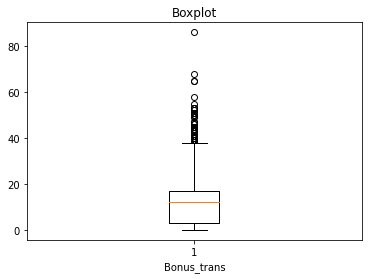

In [25]:
plt.boxplot(flight_data.Bonus_trans)            # Outliers present
plt.title('Boxplot')
plt.xlabel('Bonus_trans')
plt.show()

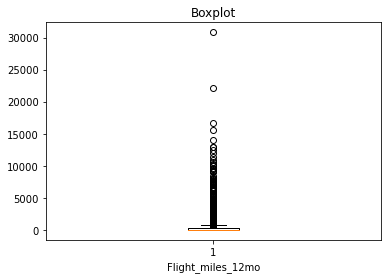

In [26]:
plt.boxplot(flight_data.Flight_miles_12mo)            # Outliers present
plt.title('Boxplot')
plt.xlabel('Flight_miles_12mo')
plt.show()

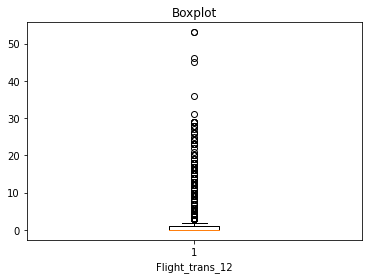

In [27]:
plt.boxplot(flight_data.Flight_trans_12)            # Outliers present
plt.title('Boxplot')
plt.xlabel('Flight_trans_12')
plt.show()

<AxesSubplot:>

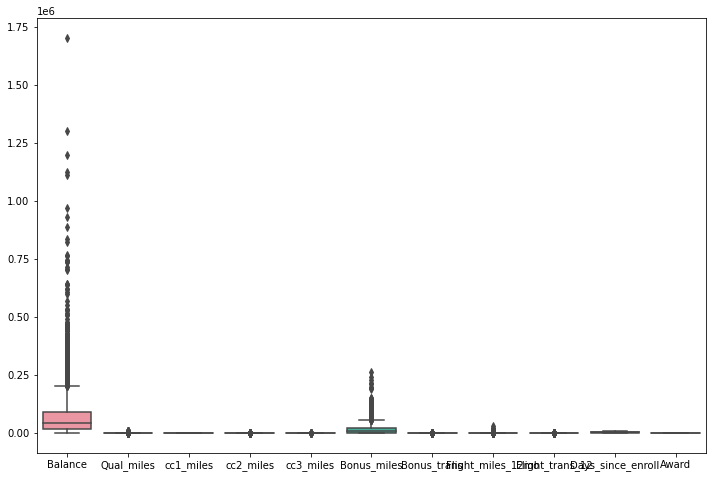

In [28]:
# Box plot for every feature in same graph:

plt.figure(figsize=(12,8))
sns.boxplot(data=flight_data)

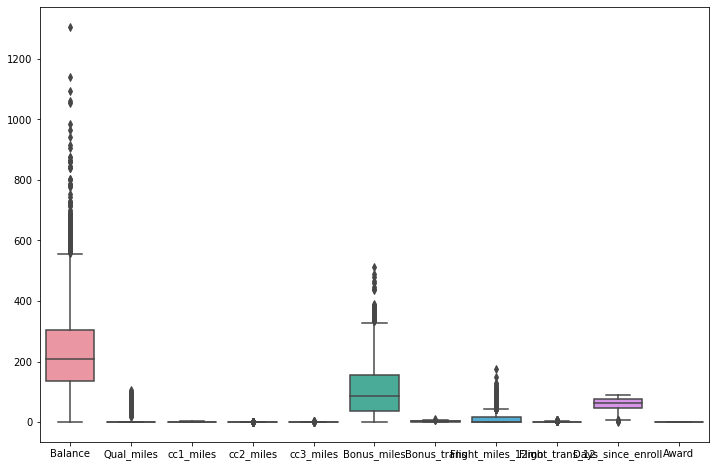

In [29]:
# we use sqrt() to see more clearly despite the outliers present in Features:

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(flight_data))
plt.show()

## Data visualization:

In [30]:
countNotermdeposit = len(flight_data[flight_data.Award == 0])
counthavetermdeposit = len(flight_data[flight_data.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(data.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(data.Award))*100)))

Percentage of Customer doesn't have a Award: 62.97%
Percentage of Customer does have a Award: 37.03%


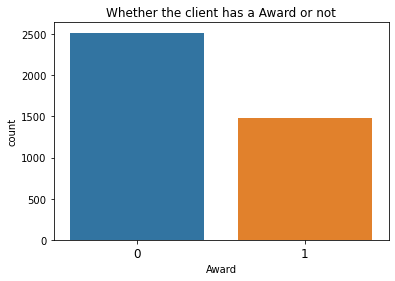

In [31]:
sns.countplot(x='Award', data=flight_data, 
              order=flight_data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not')
plt.show()

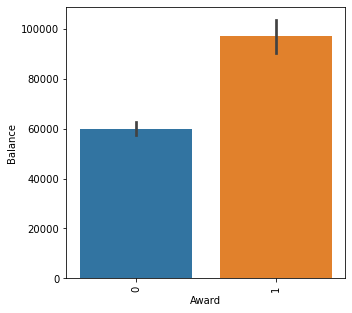

In [32]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = flight_data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [33]:
# what is correlated with Balance?

corr_matrix = flight_data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

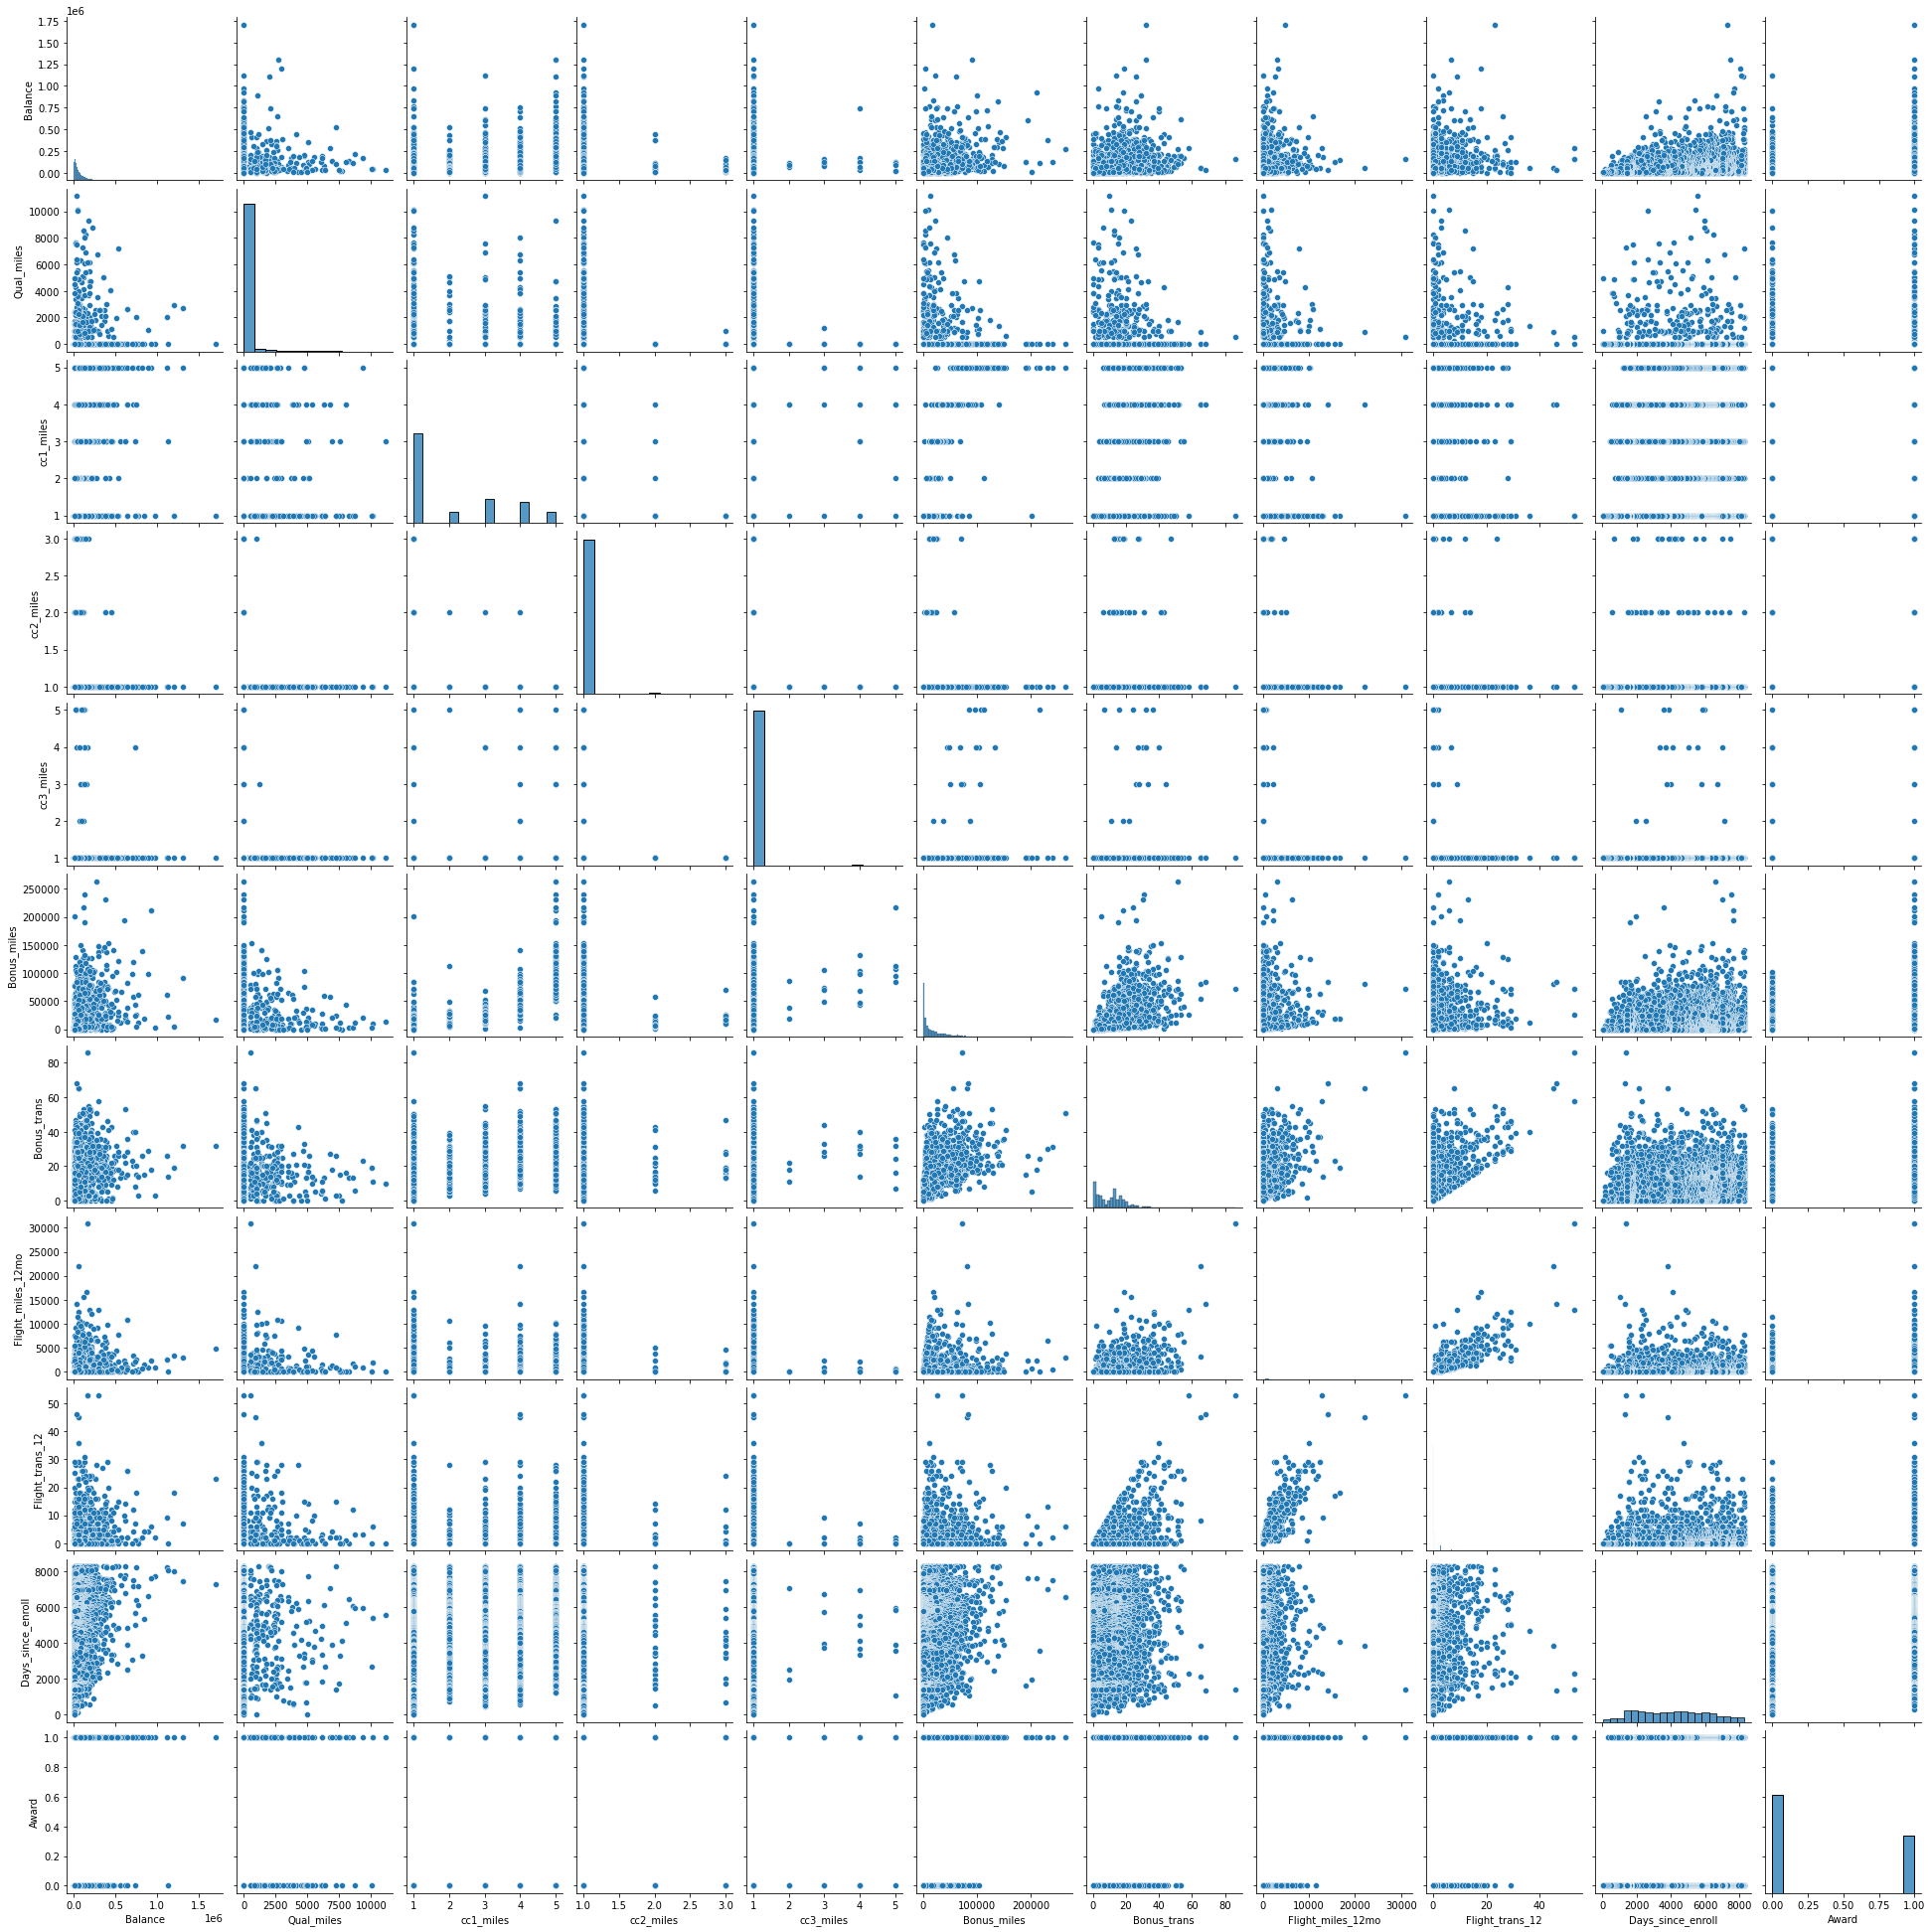

In [34]:
sns.pairplot(flight_data)

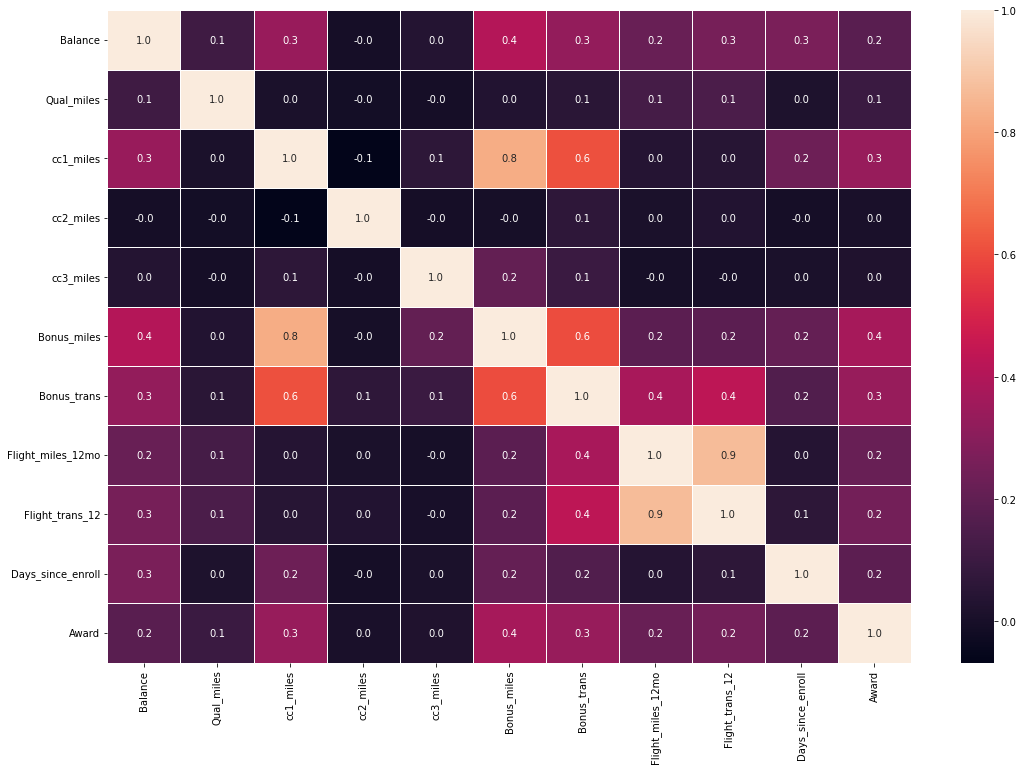

In [35]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(flight_data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

From above heatmap, some Unique points found in correlation matrix:

1. flight_trans_12 is positively correlated with flight_miles_12mo
2. bonus_trans is positively correlated with cc1_miles
3. bonus_trans is positively correlated with bonus_miles
4. bonus_miles is positively correlated with cc1_miles

The following are positively correlated;

1. Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months
2. Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions
3. Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions
4. Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card

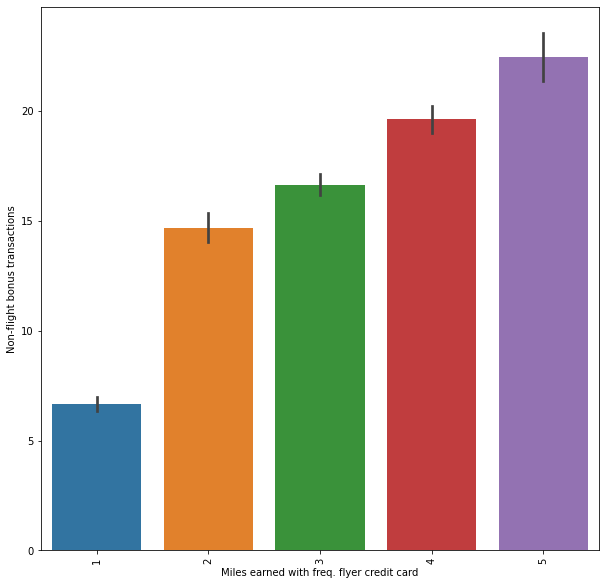

In [36]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions:

plt.figure(figsize = (10,10))
sorted_data = flight_data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

### People who fly more frequently, uses bonus transactions more.

# 4. Data Pre-Processing :

### 4.1) Standardizing the Data:

In [4]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(flight_data)
std_df.shape

(3999, 12)

### 4.2) Normalizing the data:

In [5]:
# Using Minmaxscaler for accuracy result comparison:

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(flight_data)
minmax_df.shape

(3999, 12)

# A] Hierarchial Clustering:

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics.One of the major considerations in using the K-means algorithm is deciding the value of K beforehand. The hierarchical clustering algorithm does not have this restriction.The output of the hierarchical clustering algorithm is quite different from the K-mean algorithm as well. It results in an inverted tree-shaped structure, called the dendrogram.

The key operation in hierarchical agglomerative clustering is to repeatedly combine the two nearest clusters into a larger cluster. There are three key questions that need to be answered first:

### A.1 : Dendogram on MinMaxScaler Applied on Dataset

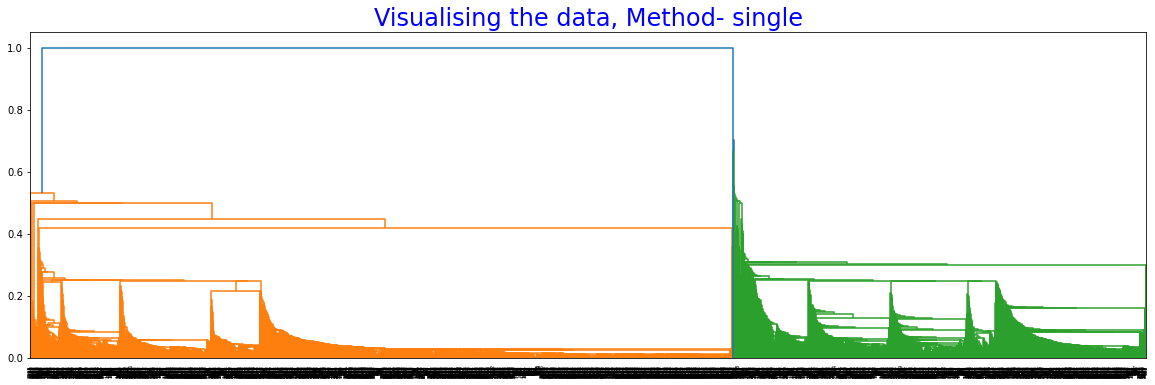

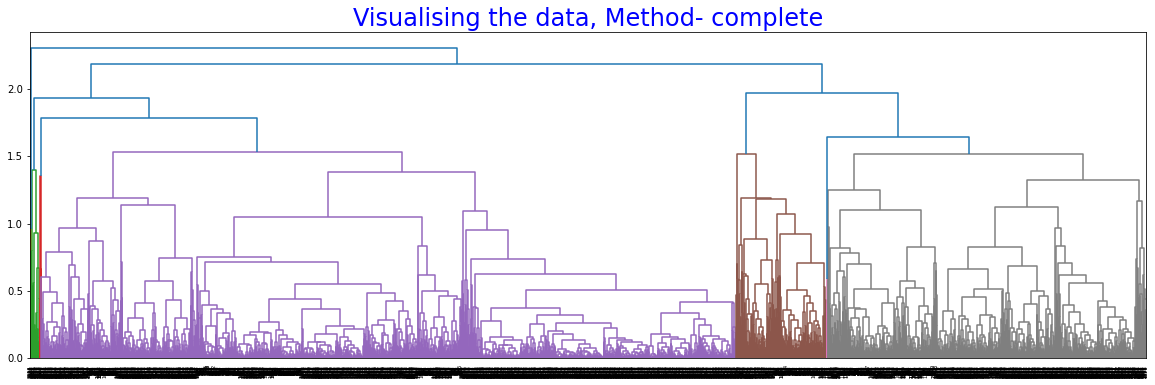

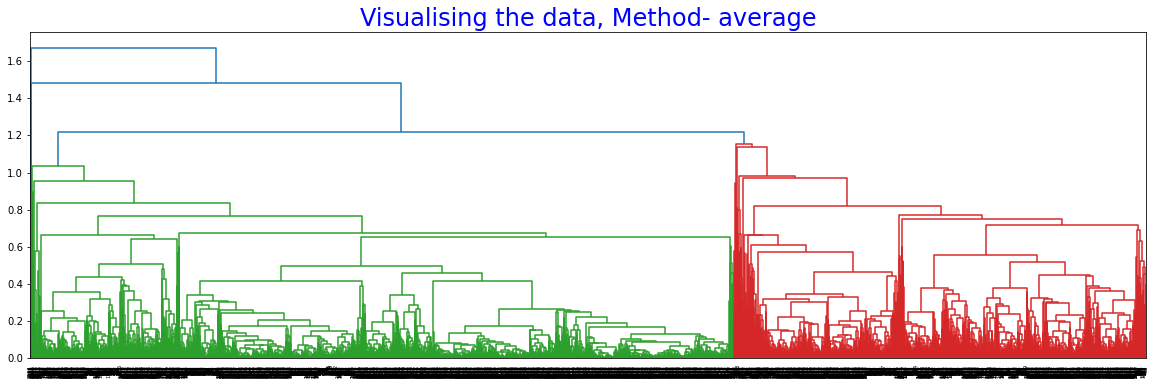

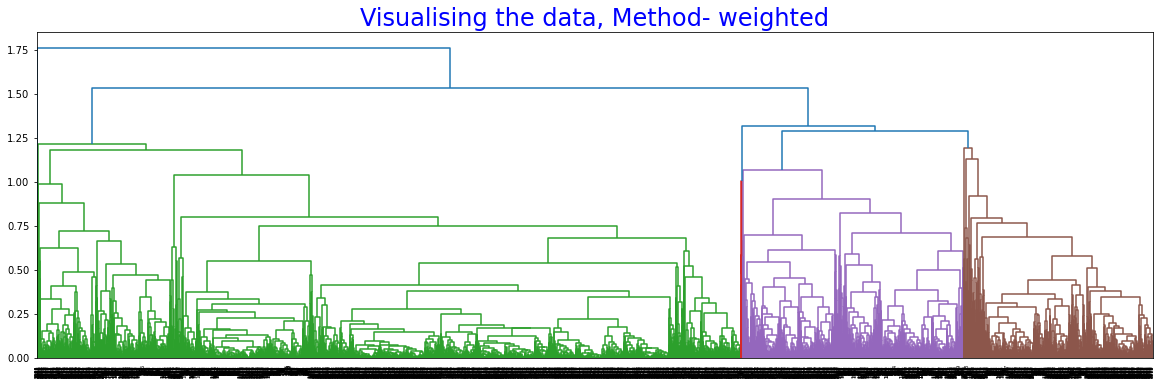

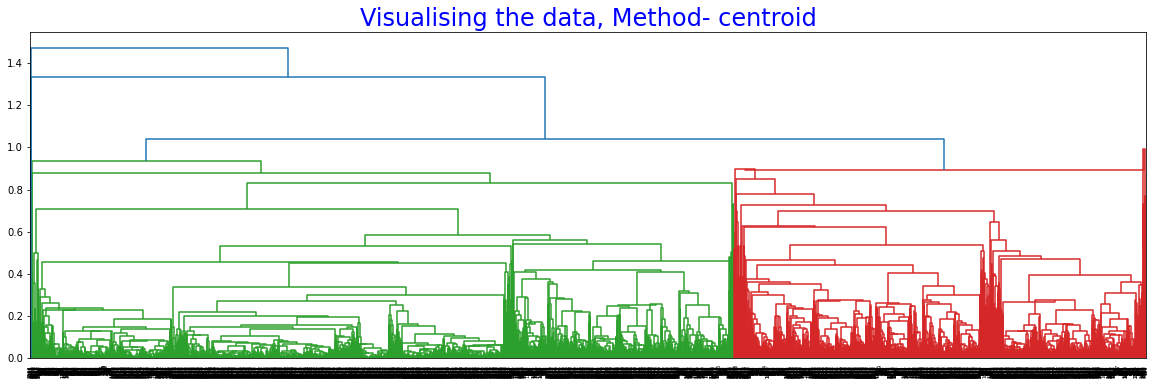

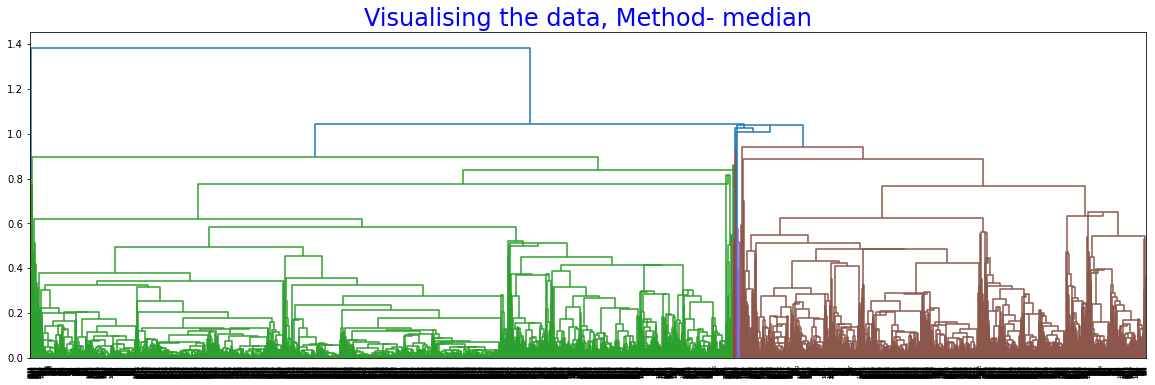

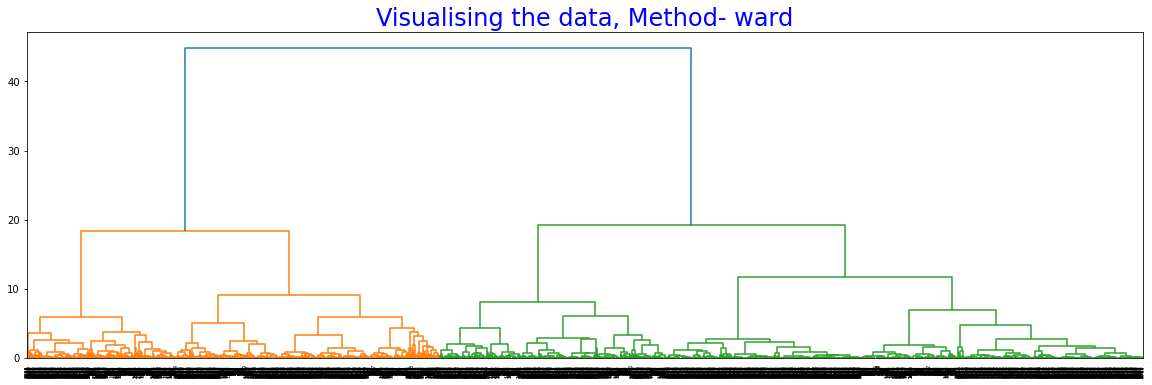

In [39]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [40]:
# Creating Clusters: Always start number from 2
n_clusters = [2,3,4,5,6,7,8]  

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # By-default it will takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535930510919477
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- average : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535930510919477

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.43550164891825044
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318787367232326
For n_clusters = 3 The average silhouette_score with linkage- average : 0.39619766243707655
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351606918177734

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42494300944261365
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.46459708515197673
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5286018409871408
F

### The seperation in Ward Method indicates that, 2 is the optimal number for clusters.

In Ward method, it is used to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart. Here it’s almost the same, the only difference is that instead of minimizing wcss we are minimizing within-cluster variants. That is the variance within each cluster.

### A.2: Dendogram on MinMaxScaler Applied on Dataset

In [41]:
# Creating Clusters: Always start number from 2
n_clusters = [2,3,4,5,6,7,8,9,10]  

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # By-default it will takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.28926595242577247
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8111134025692677
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8111134025692677
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8562820070415407

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2940432062008608
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7760836053602842
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7838667595062349
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7350532148998382

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.30814152852022786
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5985727763092806
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7731120442583631
For

**Conclusion:** Max score is found with cluster numbers 2 in standard scaler transformation & Min Max scaler transformation

Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. 
There are two types of hierarchical clustering: Agglomerative clustering Divisive clustering.

We now apply the Agglomerative clustering technique: Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combine.

## A.3 PCA: To reduce dimensions of dataset
### A.3.1 (1): Running PCA of Standardized Data (std_df)

In [42]:
# Applying PCA on std_df: We are considering 95% variance for n_components, not to loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [43]:
print(pca_std.singular_values_) # Eigen Values:

[114.62320365  83.12946351  64.9433498   63.53081811  61.96651495
  60.39644071  56.79935294  49.81594442  37.95522507]


In [44]:
print(pca_std.explained_variance_ratio_*100) # Variance containing in each formed PCA:

[29.86764604 15.70962673  9.58793945  9.17539578  8.72911177  8.29236866
  7.33403008  5.64147473  3.27490761]


In [45]:
cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

# Cummulative variance ratio: This will give an idea of, at how many no. of PCAs, the cummulative addition of.....

array([29.86764604, 45.57727277, 55.16521222, 64.340608  , 73.06971976,
       81.36208842, 88.69611851, 94.33759324, 97.61250085])

**Conclusion:**
By applying PCA on standardized data with 95% variance, it gives a 9 PCA components.

### A.3.1 (2): Silhouette Score method for PCA Standard Scaled Data

In [46]:
# Creating Clusters: Always start number from 2
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15] 

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # By-default it will takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.19974848194356434
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8108872970217894
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8108872970217894
For n_clusters = 2 The average silhouette_score with linkage- single : 0.7383486934304829

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.21117381561703907
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7784326687701912
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7858157031588873
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7380711786432603

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.21512158688323976
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6685647808748002
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7754755890058265
Fo

### A.3.1 (3): Running Hierarchical Clustering (Agglomerative Clustering)

In [47]:
agg_clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [48]:
agg_clustering.n_clusters_ # Cluster numbers

10

In [49]:
(sil(pca_std_df, agg_clustering.labels_)*100).round(3) # Clustering Score

28.498

### Putting Cluster lables into original dataset & Analysis of the same:

In [50]:
flight_data['Hierarchical_labels'] = agg_clustering.labels_ # Concating Labels with main dataset copy:
flight_data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1   28143    0           1          1          1          174           
2   19244    0           1          1          1          215           
3   41354    0           1          1          1          4123          
4   14776    0           1          1          1          500           
5   97752    0           4          1          1          43300         

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1   1            0                  0                7000               0       
2   2            0                  0                6968               0       
3   4            0                  0                7034               0       
4   1            0                  0                6952               0       
5   26           2077               4                6935               1       

    Hierarchical_labels  
ID                       
1   0                    
2   0                    
3   0                    
4   0                    
5   7

In [51]:
flight_data.groupby('Hierarchical_labels').agg(['mean'])

Balance   Qual_miles cc1_miles cc2_miles cc3_miles  \
                              mean         mean      mean      mean      mean   
Hierarchical_labels                                                             
0                    35544.690319   1.894768     1.071557  1.000000  1.000000   
1                    106691.116046  9.482808     3.249284  1.000000  1.000000   
2                    59183.817881   34.030905    2.355408  1.000000  1.000000   
3                    68876.581395   23.255814    1.139535  2.348837  1.000000   
4                    129951.388889  65.666667    3.388889  1.000000  3.722222   
5                    145767.807692  483.692308   2.576923  1.000000  1.000000   
6                    107778.330769  3553.684615  1.884615  1.000000  1.000000   
7                    123897.501873  59.329588    4.464419  1.000000  1.000000   
8                    82556.378698   117.325444   1.035503  1.000000  1.000000   
9                    626516.283019  202.452830   3.698113  1.000000  1.000000   

                      Bonus_miles Bonus_trans Flight_miles_12mo  \
                             mean        mean              mean   
Hierarchical_labels                                               
0                    2690.832231   5.926037    98.142514          
1                    27320.199140  16.641834   185.707736         
2                    18106.241722  11.897351   183.070640         
3                    14689.837209  17.534884   582.627907         
4                    86259.888889  26.222222   422.222222         
5                    41204.115385  35.596154   8882.211538        
6                    17001.907692  11.276923   764.107692         
7                    66245.951311  24.352060   1014.719101        
8                    8169.911243   11.946746   2757.295858        
9                    56755.566038  20.415094   948.886792         

                    Flight_trans_12 Days_since_enroll     Award  
                               mean              mean      mean  
Hierarchical_labels                                              
0                    0.332532        3484.751654       0.008419  
1                    0.547278        4667.399713       0.000000  
2                    0.584989        4365.253863       1.000000  
3                    2.209302        3968.930233       0.395349  
4                    1.333333        4488.777778       0.500000  
5                    23.326923       4557.961538       0.865385  
6                    2.384615        4091.761538       0.530769  
7                    3.112360        5494.797753       0.988764  
8                    8.047337        3710.431953       0.680473  
9                    3.679245        6559.113208       0.792453

### Plotting barplot using groupby method to get visualize how many row No. in each cluster:

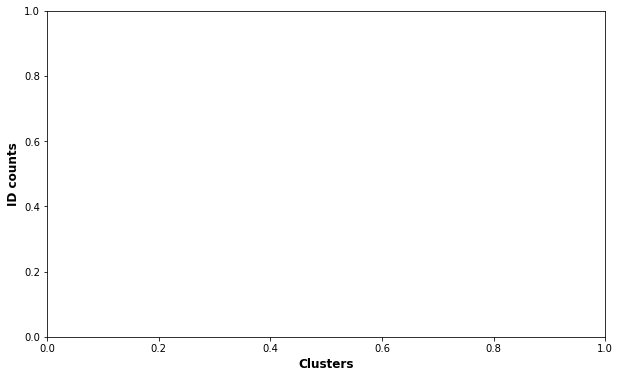

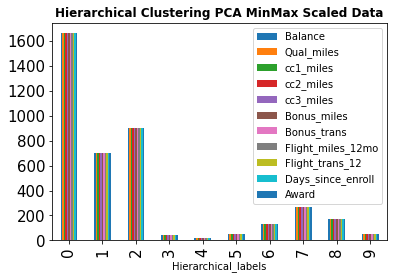

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
flight_data.groupby(['Hierarchical_labels']).count().plot(kind='bar')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

## A.3.2 (1): Running PCA of MinMaxscalar Data (minmax_df)

In [53]:
pca_minmax =  PCA(random_state=10, n_components=0.95) # Applying PCA on minmax_df
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [54]:
print(pca_minmax.singular_values_) # Eigen values:

[32.61670755 20.38332523 14.95110164  6.55157753]


In [55]:
print(pca_minmax.explained_variance_ratio_*100) # Variance containing in each formed PCA

[58.10867135 22.69398556 12.20975906  2.34451208]


**Conclusion:**
By applying PCA on MinMaxscalr transformation, data gives 4 PCA components.

## A.3.2 (2) Silhouette Score method for PCA MinMax Scaled Data

In [56]:
# Creating Clusters: Always start number from 2
n_clusters = [2,3,4,5,6,7,8]  

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) #By-default it will takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = sil(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5570574742349607
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4506642023138536
For n_clusters = 2 The average silhouette_score with linkage- average : 0.47470338514970273
For n_clusters = 2 The average silhouette_score with linkage- single : 0.5570574742349607

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.46684428613968126
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.552744613347034
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5545574774683506
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5558068847998209

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.46056391656489387
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.509530818047692
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4979760029410702
For 

**Conclusion:** 
Max score is found with cluster numbers 2 for ward and mostly with others.

### A.3.2 (3) Running of Hierarchical Clustering (Agglomerative Clustering)

In [57]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [58]:
agg_clustering.n_clusters_ # Cluster numbers

2

In [59]:
(sil(pca_minmax_df, agg_clustering.labels_)*100).round(3) # Clustering Score

55.706

### Putting Cluster lables into original dataset and analysis of the same

In [60]:
flight_data['Hierarchical_labels'] = agg_clustering.labels_  # Concating Labels with main dataset copy:
flight_data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1   28143    0           1          1          1          174           
2   19244    0           1          1          1          215           
3   41354    0           1          1          1          4123          
4   14776    0           1          1          1          500           
5   97752    0           4          1          1          43300         

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1   1            0                  0                7000               0       
2   2            0                  0                6968               0       
3   4            0                  0                7034               0       
4   1            0                  0                6952               0       
5   26           2077               4                6935               1       

    Hierarchical_labels  
ID                       
1   0                    
2   0                    
3   0                    
4   0                    
5   1

In [61]:
flight_data.groupby('Hierarchical_labels').agg(['mean'])

Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                             mean        mean      mean      mean      mean   
Hierarchical_labels                                                           
0                    59807.839555  87.602462   1.705322  1.01390   1.008737   
1                    97053.051317  240.196489  2.661715  1.01553   1.018231   

                      Bonus_miles Bonus_trans Flight_miles_12mo  \
                             mean        mean              mean   
Hierarchical_labels                                               
0                    10227.689039  9.142971    226.292295         
1                    28905.414585  15.782579   857.501013         

                    Flight_trans_12 Days_since_enroll Award  
                               mean              mean  mean  
Hierarchical_labels                                          
0                    0.652502        3820.652105       0.0   
1                    2.599595        4625.062120       1.0

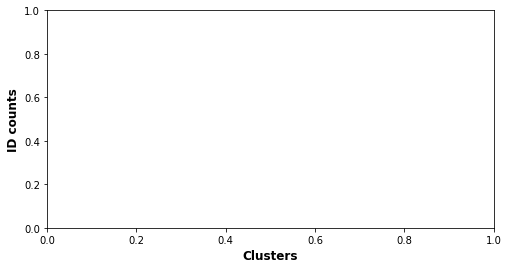

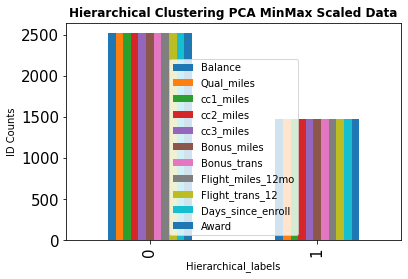

In [62]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(8, 4))
flight_data.groupby(['Hierarchical_labels']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# C] KMeans Clustering:

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. 

**Then keep the iterations running until one of the below satisifes:**

1. Centroids of newly formed clusters do not change
2. Points remain in the same cluster
3. Maximum number of iterations are reached

In K-means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve, aka Scree plot.

### C.1: Elbow Method for Determining Cluster Amount:
#### Standard Scaler Applied on Data:

In [63]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0   1             43989.000000  
1   2             35409.516630  
2   3             30899.271222  
3   4             27153.889705  
4   5             24884.134114  
5   6             21093.809005  
6   7             18891.919051  
7   8             17316.753604  
8   9             15965.755213  
9   10            14728.674847  
10  11            13707.808333  
11  12            12953.122665  
12  13            12485.638078  
13  14            11976.270735

In [64]:
# within-cluster sum-of-squares criterion. 
# Use Elbow Graph to find optimum number of clusters (K-value) from K values range.
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS. 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.

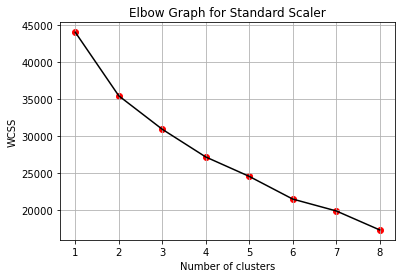

In [65]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range Vs WCSS to get Elbow graph for choosing K (no. of clusters):

plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

There is no clear "elbow" visible. A choice of 3 or 4 clusters seems to be fair. We will try the silhouette score

### EXPLORE THE OTHER CLUSTER VALIDATION TECHNIQUES:

1. Silhouette score

2. Calinski harabasz score

3. Work with IRIS Dataset. Remove your target column.

In [66]:
#Build Cluster algorithm:

from sklearn.cluster import KMeans
clusters_new = KMeans(n_clusters=3, random_state=12)
clusters_new.fit(std_df)

KMeans(n_clusters=3, random_state=12)

In [67]:
clusters_new.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [68]:
#Assign clusters to the data set:

flight_data['clusterid_new'] = clusters_new.labels_

In [69]:
flight_data

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1     28143    0           1          1          1          174           
2     19244    0           1          1          1          215           
3     41354    0           1          1          1          4123          
4     14776    0           1          1          1          500           
5     97752    0           4          1          1          43300         
...     ...   ..          ..         ..         ..          ...           
4017  18476    0           1          1          1          8525          
4018  64385    0           1          1          1          981           
4019  73597    0           3          1          1          25447         
4020  54899    0           1          1          1          500           
4021  3016     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1     1            0                  0                7000                
2     2            0                  0                6968                
3     4            0                  0                7034                
4     1            0                  0                6952                
5     26           2077               4                6935                
...  ..           ..                 ..                 ...                
4017  4            200                1                1403                
4018  5            0                  0                1395                
4019  8            0                  0                1402                
4020  1            500                1                1401                
4021  0            0                  0                1398                

      Award  Hierarchical_labels  clusterid_new  
ID                                               
1     0      0                    1              
2     0      0                    1              
3     0      0                    1              
4     0      0                    1              
5     1      1                    0              
...  ..     ..                   ..              
4017  1      1                    1              
4018  1      1                    1              
4019  1      1                    0              
4020  0      0                    1              
4021  0      0                    1              

[3999 rows x 13 columns]

In [70]:
# These are standardized values:
clusters_new.cluster_centers_

array([[ 0.44055177,  0.00660151,  1.22773742, -0.08189368,  0.135046  ,
         0.97898353,  0.77570408, -0.08016085, -0.09044279,  0.3683969 ,
         0.58753835],
       [-0.28766217, -0.05538795, -0.59296692,  0.02985801, -0.06078954,
        -0.50676102, -0.47352705, -0.18645394, -0.19822979, -0.19476392,
        -0.33932453],
       [ 1.19834441,  0.82002725,  0.06242226,  0.14807116, -0.06276658,
         0.58267436,  1.59217228,  3.53177027,  3.79414404,  0.28312709,
         0.9023012 ]])

In [71]:
flight_data.groupby('clusterid_new').agg(['mean'])

Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                        mean        mean      mean      mean      mean   
clusterid_new                                                            
0              117871.954290  150.673617  3.744186  1.002406  1.038492   
1              44560.340935   100.494009  1.241979  1.018941  1.000387   
2              194350.181818  778.460606  2.145455  1.036364  1.000000   

                Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                       mean        mean              mean            mean   
clusterid_new                                                               
0              40719.429030  19.040898   347.714515        1.029671         
1              4883.880170   7.040974    198.838423        0.621569         
2              31215.236364  26.890909   5404.654545       15.763636        

              Days_since_enroll     Award Hierarchical_labels  
                           mean      mean                mean  
clusterid_new                                                  
0              4880.696872       0.653569  0.653569            
1              3713.902203       0.206030  0.206030            
2              4703.181818       0.806061  0.806061

In [72]:
flight_data[flight_data['clusterid_new']==0]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
5     97752    0           4          1          1          43300         
7     84914    0           3          1          1          27482         
10    104860   0           3          1          1          28426         
12    96522    0           5          1          1          61105         
16    28495    0           4          1          1          49442         
...     ...   ..          ..         ..         ..            ...         
4002  57793    0           3          1          1          20959         
4003  28867    0           3          1          1          19169         
4008  59017    0           4          1          1          34746         
4014  39142    0           3          1          1          14981         
4019  73597    0           3          1          1          25447         

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
5     26           2077               4                6935                
7     25           0                  0                6994                
10    28           1150               3                6931                
12    19           0                  0                6924                
16    15           0                  0                6912                
...   ..          ..                 ..                 ...                
4002  15           1198               3                1424                
4003  28           0                  0                1425                
4008  25           0                  0                1418                
4014  28           0                  0                1408                
4019  8            0                  0                1402                

      Award  Hierarchical_labels  clusterid_new  
ID                                               
5     1      1                    0              
7     0      0                    0              
10    1      1                    0              
12    1      1                    0              
16    1      1                    0              
...  ..     ..                   ..              
4002  1      1                    0              
4003  0      0                    0              
4008  0      0                    0              
4014  0      0                    0              
4019  1      1                    0              

[1247 rows x 13 columns]

In [73]:
flight_data

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1     28143    0           1          1          1          174           
2     19244    0           1          1          1          215           
3     41354    0           1          1          1          4123          
4     14776    0           1          1          1          500           
5     97752    0           4          1          1          43300         
...     ...   ..          ..         ..         ..          ...           
4017  18476    0           1          1          1          8525          
4018  64385    0           1          1          1          981           
4019  73597    0           3          1          1          25447         
4020  54899    0           1          1          1          500           
4021  3016     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1     1            0                  0                7000                
2     2            0                  0                6968                
3     4            0                  0                7034                
4     1            0                  0                6952                
5     26           2077               4                6935                
...  ..           ..                 ..                 ...                
4017  4            200                1                1403                
4018  5            0                  0                1395                
4019  8            0                  0                1402                
4020  1            500                1                1401                
4021  0            0                  0                1398                

      Award  Hierarchical_labels  clusterid_new  
ID                                               
1     0      0                    1              
2     0      0                    1              
3     0      0                    1              
4     0      0                    1              
5     1      1                    0              
...  ..     ..                   ..              
4017  1      1                    1              
4018  1      1                    1              
4019  1      1                    0              
4020  0      0                    1              
4021  0      0                    1              

[3999 rows x 13 columns]

### 1. Silhouette Score:
#### Silhouette coefficient

This analysis measures how well an observation is clustered and it estimates average distance between clusters. 
Silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters.
For each observation (i), the silhouette width (si) is calculated.

In [74]:
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4,5,6,7,8,9,10] # No. of clusters
clusters_inertia = []             # Inertia of clusters
s_scores = []                     # Silhouette Scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)                    # Data used for Elbow Method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg)                             # Data used for Silhouette Score Method

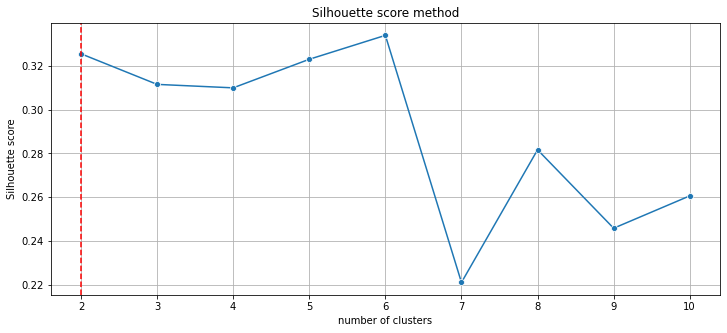

In [75]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

# Silhouette score method indicates that the best options will be 2 clusters.

In [76]:
# How to find optimum number of  cluster?
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [78]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)

In [79]:
wcss

[43988.99999999999,
 35409.5166298613,
 30899.7097432495,
 27154.035327088204,
 24885.496241999543,
 22304.458913056435,
 19502.8560982205,
 17316.753604356494,
 15960.424188770634,
 14728.674847210143]

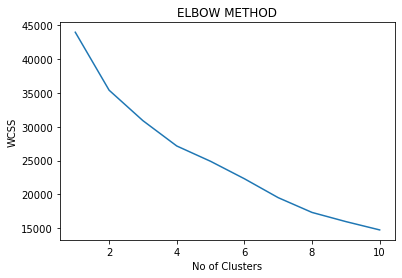

In [80]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [81]:
model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3999,)

### Contine...with Silhouette Score:

In [83]:
pip install -U yellowbrick

In [86]:
from yellowbrick.cluster import KElbowVisualizer

Elbow Plot for Standard Scaler data


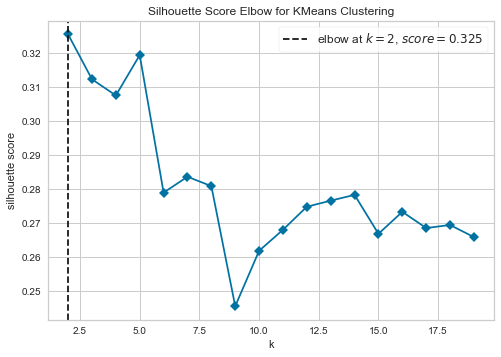

In [87]:
# How many number of clusters. n_clusters?
# Since true labels are not known, we will use Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.

model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with number of clusters and metric:

visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

# Fit data and visualize:

print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_df)    
visualizer.poof()
plt.show()

In [88]:
# With elbow method, ideal number of clusters to use was 6 & We will also use Silhouette score to determine an optimal number:

clust_list = [2,3,4,5,6,7,8,9]

# Silhouette score for stadardScaler applied on data:

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3256981835090824
For n_clusters = 3 The average silhouette_score is : 0.3121716765282414
For n_clusters = 4 The average silhouette_score is : 0.32563311512799126
For n_clusters = 5 The average silhouette_score is : 0.31819537664378844
For n_clusters = 6 The average silhouette_score is : 0.3338735662323181
For n_clusters = 7 The average silhouette_score is : 0.22085896619040385
For n_clusters = 8 The average silhouette_score is : 0.23657639934232003
For n_clusters = 9 The average silhouette_score is : 0.2984364654012059


For n_clusters = 2 The average silhouette_score is : 0.3256981835090824
For n_clusters = 3 The average silhouette_score is : 0.3121716765282414
For n_clusters = 4 The average silhouette_score is : 0.32563311512799126
For n_clusters = 5 The average silhouette_score is : 0.31819537664378844
For n_clusters = 6 The average silhouette_score is : 0.3338735662323181
For n_clusters = 7 The average silhouette_score is : 0.22085896619040385
For n_clusters = 8 The average silhouette_score is : 0.23657639934232003
For n_clusters = 9 The average silhouette_score is : 0.2984364654012059


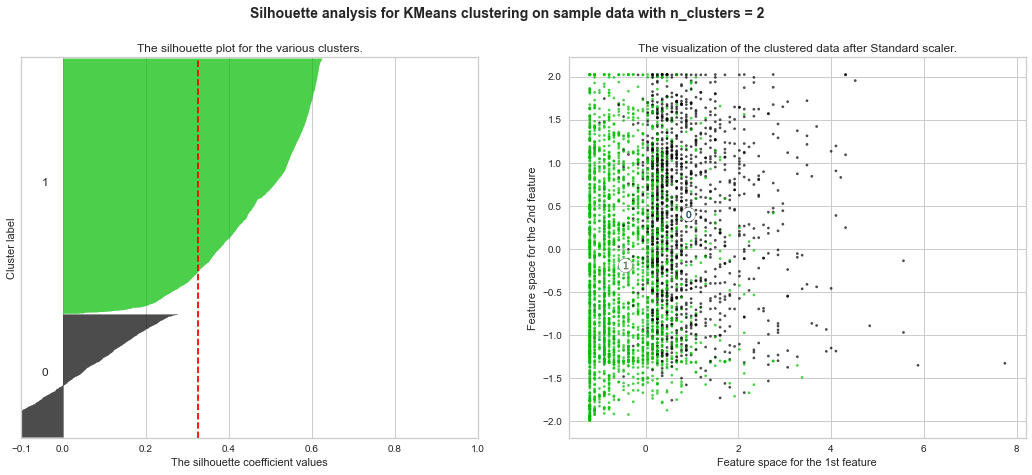

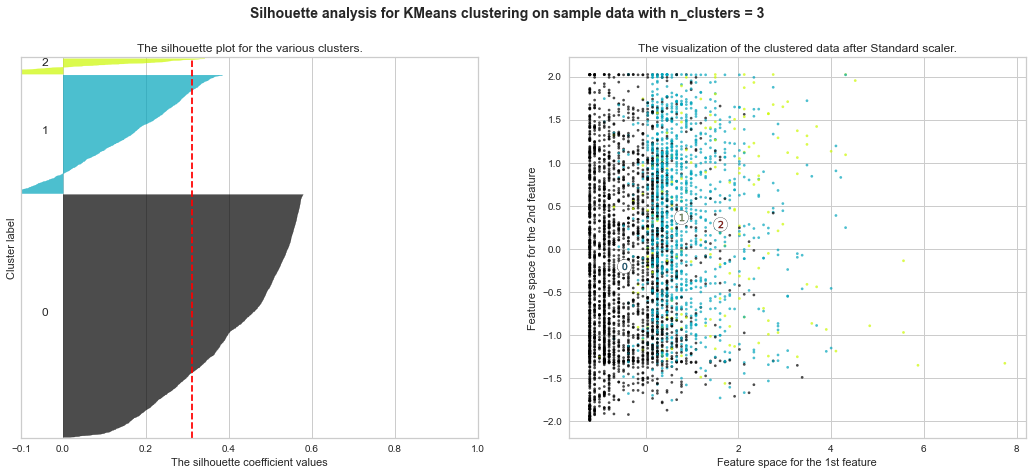

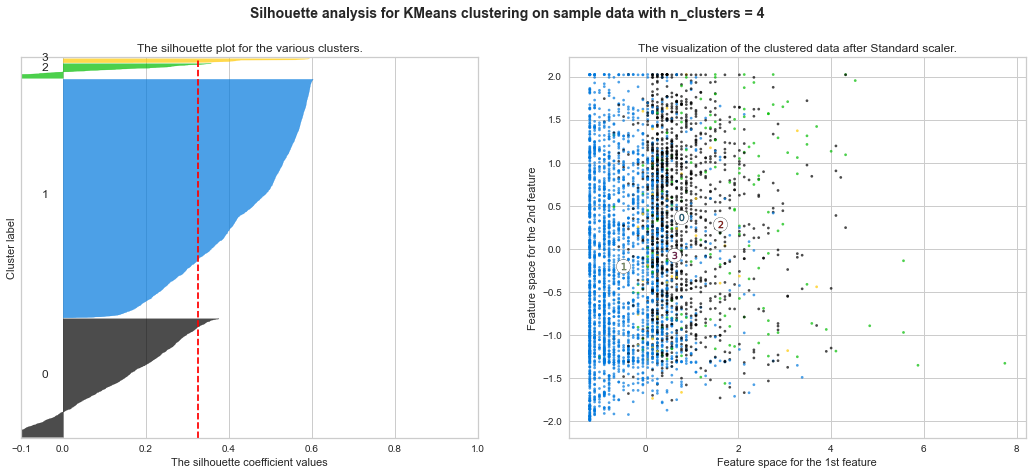

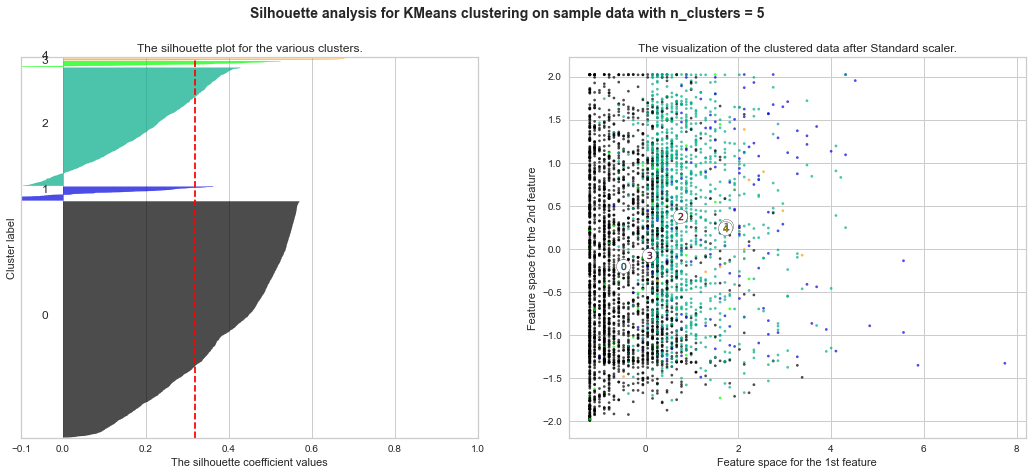

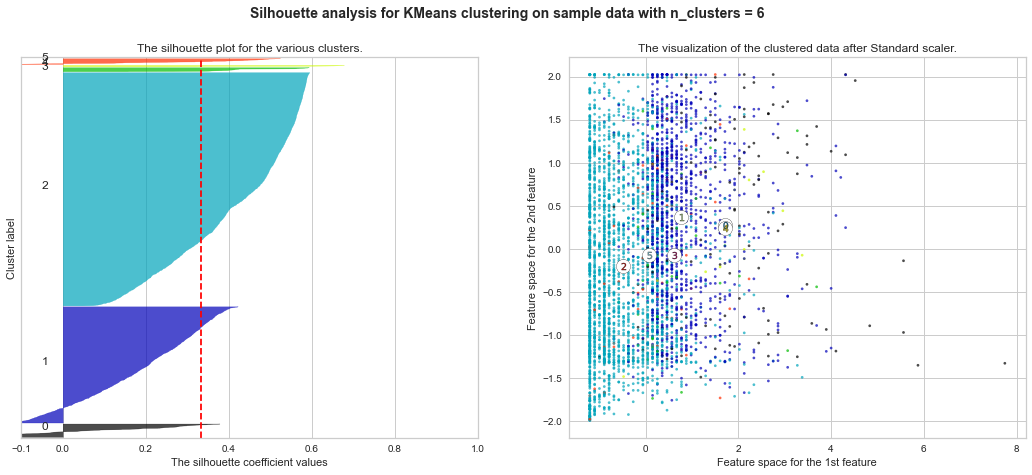

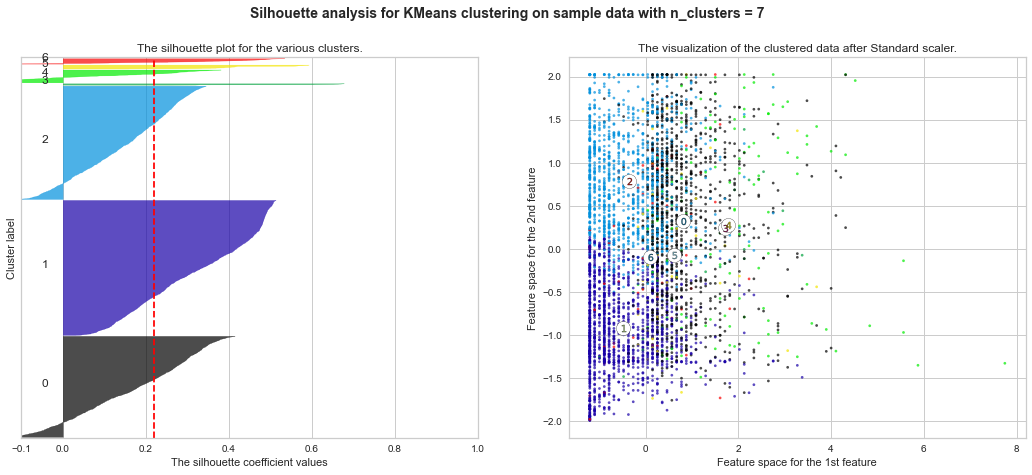

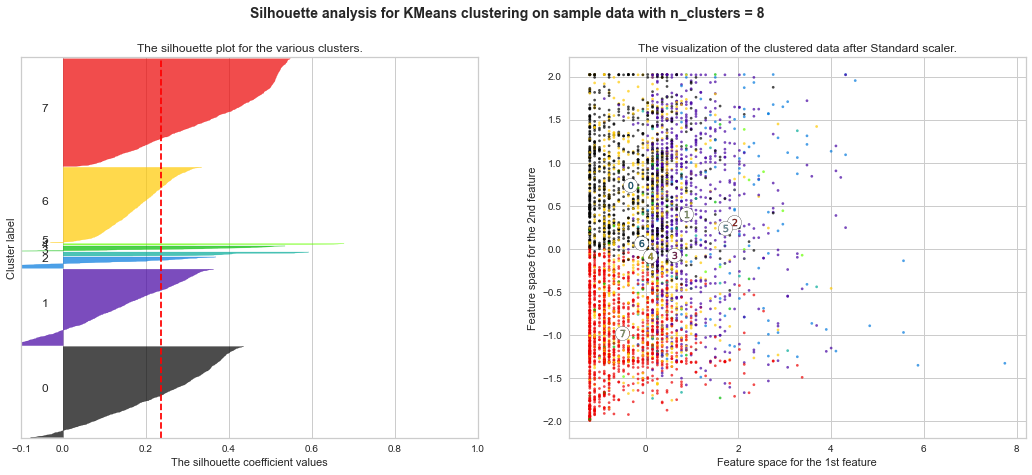

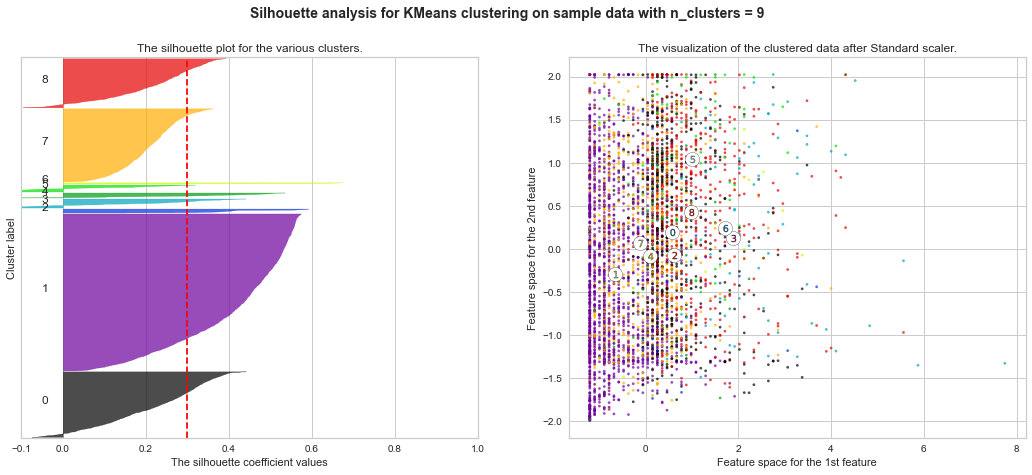

In [89]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:                   
    
    fig, (ax1, ax2) = plt.subplots(1, 2) # Create a subplot with 1 row and 2 columns:
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is Silhouette plot & Sil. coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    
    ax1.set_xlim([-0.1, 1])                             
    
    #(n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters to demarcate them clearly:

    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value & a random generator seed of 10 for reproducibility:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)

    # Sil_score gives average value for all samples. This gives a perspective into the density & separation of formed clusters:
    
    silhouette_avg = sil(std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample"
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them:
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,6], std_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,6], centers[:,9], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### **Conclusion:**
According to the silhouette score, The standardized data,
The ideal number of clusters is 6, with a score higher than other options, of 0.33

## Build KMeans Cluster algorithm using K=6 and Standard Scaler Applied Dataset

In [90]:
# Good number of cluster found = 6
# Model building using cluster numbers = 6

model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3999,)

In [91]:
y_predict_kmeans # These are nothing but the cluster labels:

array([2, 2, 2, ..., 1, 2, 2])

In [92]:
model_kmeans.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [93]:
model_kmeans.cluster_centers_ # cluster centres associated with each lables:

array([[ 1.13686833,  0.4142613 ,  0.1345493 , -0.09824189, -0.06276658,
         0.65640088,  1.70548646,  3.77107713,  4.00212558,  0.27153799,
         0.88395812],
       [ 0.43381284, -0.11301262,  1.21014978, -0.09824189, -0.05449778,
         0.92813517,  0.75269133, -0.08065818, -0.08956555,  0.37079373,
         0.57854007],
       [-0.29444721, -0.12883455, -0.60151188, -0.09824189, -0.06071593,
        -0.51682757, -0.4934919 , -0.18636264, -0.19845942, -0.19791068,
        -0.34993321],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.387

In [ ]:
# Within-cluster sum of squared
# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore, smaller the inertia, denser the cluster(closer together all the points are)

In [94]:
model_kmeans.inertia_

21089.97362892965

In [108]:
#Assign clusters to the data set:

flight_data['Kmeans_label'] = model_kmeans.labels_

In [114]:
# Group data by Clusters (K=6)
flight_data.groupby('Kmeans_label').agg(['mean'])

ID        Balance   Qual_miles cc1_miles cc2_miles  \
                     mean           mean         mean      mean      mean   
Kmeans_label                                                                
0             1743.867133  188155.664336  464.573427   2.244755  1.000000   
1             1599.831858  117176.916331  58.446500    3.720837  1.000000   
2             2233.860465  43882.372895   43.558140    1.229751  1.000000   
3             2269.372093  68876.581395   23.255814    1.139535  2.348837   
4             1664.866667  138061.400000  78.800000    3.466667  1.000000   
5             2057.295082  119660.491803  5351.065574  2.000000  1.000000   

             cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                  mean          mean        mean              mean   
Kmeans_label                                                         
0             1.000000  32995.580420  27.979021   5739.692308        
1             1.001609  39485.872084  18.811746   346.617860         
2             1.000401  4644.210104   6.852847    199.160385         
3             1.000000  14689.837209  17.534884   582.627907         
4             4.066667  93927.866667  28.066667   506.666667         
5             1.000000  18683.475410  12.229508   963.639344         

             Flight_trans_12 Days_since_enroll     Award  
                        mean              mean      mean  
Kmeans_label                                              
0             16.552448       4679.251748       0.797203  
1             1.032180        4887.485921       0.649236  
2             0.621091        3706.378508       0.200882  
3             2.209302        3968.930233       0.395349  
4             1.600000        4613.866667       0.533333  
5             2.868852        3971.491803       0.557377

In [109]:
from yellowbrick.cluster import SilhouetteVisualizer

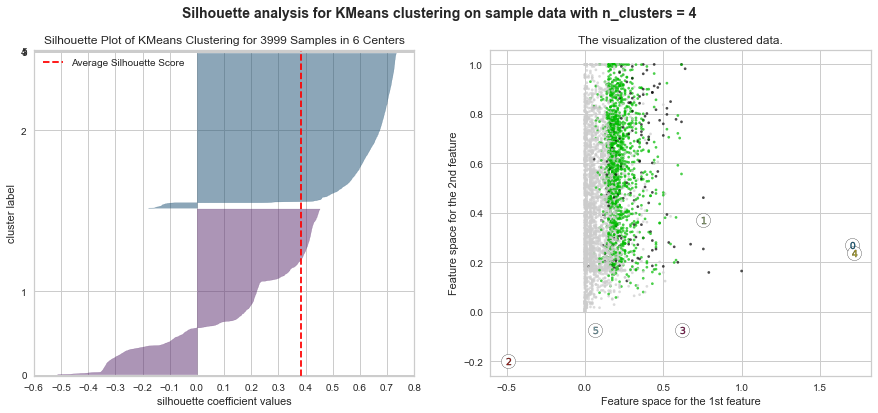

In [115]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(minmax_df)

# 2nd Plot showing actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 2 is number of clusters
ax2.scatter(minmax_df[:, 6], minmax_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters:

centers1 = model_kmeans.cluster_centers_

# Draw white circles at cluster centers:

ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

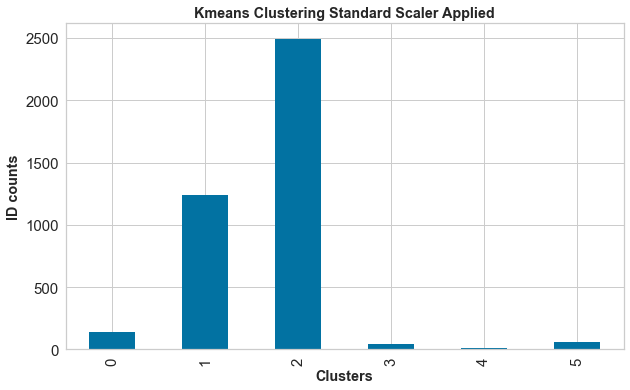

In [111]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
flight_data.groupby(['Kmeans_label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

### Elbow Method and Silhouette Score on MinMaxScaler Applied Data

In [116]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0   1             1830.793213   
1   2             823.675698    
2   3             625.176821    
3   4             436.708858    
4   5             348.943322    
5   6             315.151064    
6   7             287.942114    
7   8             263.050001    
8   9             243.924436    
9   10            226.113676    
10  11            215.836603    
11  12            205.867315    
12  13            200.271267    
13  14            187.943989

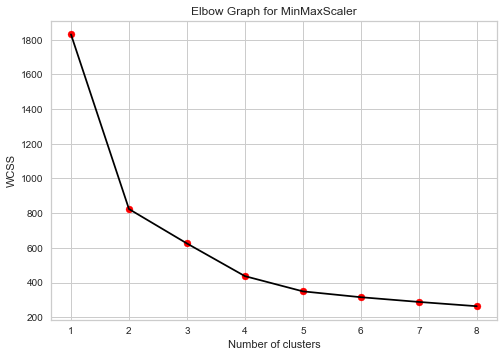

In [117]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (No. of clusters):

plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

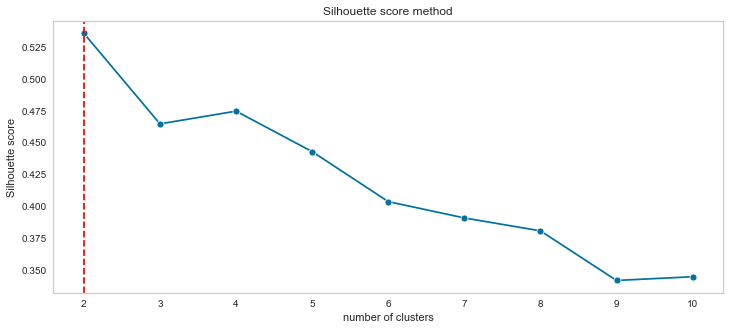

In [118]:
from sklearn.metrics import silhouette_score

n_clusters = [2,3,4,5,6,7,8,9,10] # Number of clusters
clusters_inertia = []             # inertia of clusters
s_scores = []                     # Silhouette scores

for n in n_clusters:
    
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(minmax_df)
    clusters_inertia.append(KM_est.inertia_)                     # data for elbow method:
    silhouette_avg = silhouette_score(minmax_df, KM_est.labels_)
    s_scores.append(silhouette_avg)                              # data for silhouette score method:

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for MinMaxScaler data


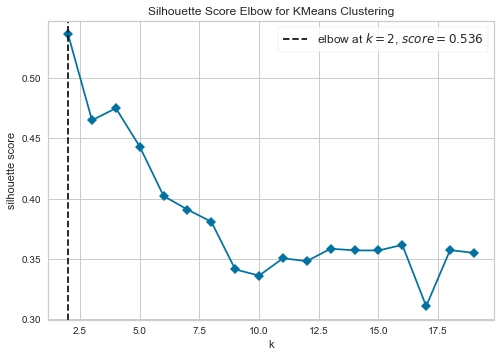

In [119]:
# Instantiate a scikit-learn K-Means model. We will check for two diff hyperparameters value effect:

model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate KElbowVisualizer with number of clusters and metric:

visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)

# Fit data and visualize:

print('Elbow Plot for MinMaxScaler data')
visualizer.fit(minmax_df)    
visualizer.poof()
plt.show()

In [120]:
# With elbow method,ideal number of clusters to use was 6. We will also use Silhouette score to determine an optimal number:

clust_list = [2,3,4,5,6,7,8,9]

# Silhouette score for MinMaxScaler Applied on data:

for n_clusters in clust_list:
    
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.535930510919477
For n_clusters = 3 The average silhouette_score is : 0.46484529388583046
For n_clusters = 4 The average silhouette_score is : 0.4744941579482721
For n_clusters = 5 The average silhouette_score is : 0.4430672072796034
For n_clusters = 6 The average silhouette_score is : 0.38865859989228385
For n_clusters = 7 The average silhouette_score is : 0.3909601011818369
For n_clusters = 8 The average silhouette_score is : 0.38030165896247936
For n_clusters = 9 The average silhouette_score is : 0.3842538055607832


For n_clusters = 2 The average silhouette_score is : 0.535930510919477
For n_clusters = 3 The average silhouette_score is : 0.46484529388583046
For n_clusters = 4 The average silhouette_score is : 0.47483765255961
For n_clusters = 5 The average silhouette_score is : 0.4430672072796034
For n_clusters = 6 The average silhouette_score is : 0.4021621004641961
For n_clusters = 7 The average silhouette_score is : 0.3909380562842146
For n_clusters = 8 The average silhouette_score is : 0.38083842933577705
For n_clusters = 9 The average silhouette_score is : 0.3414078154201448


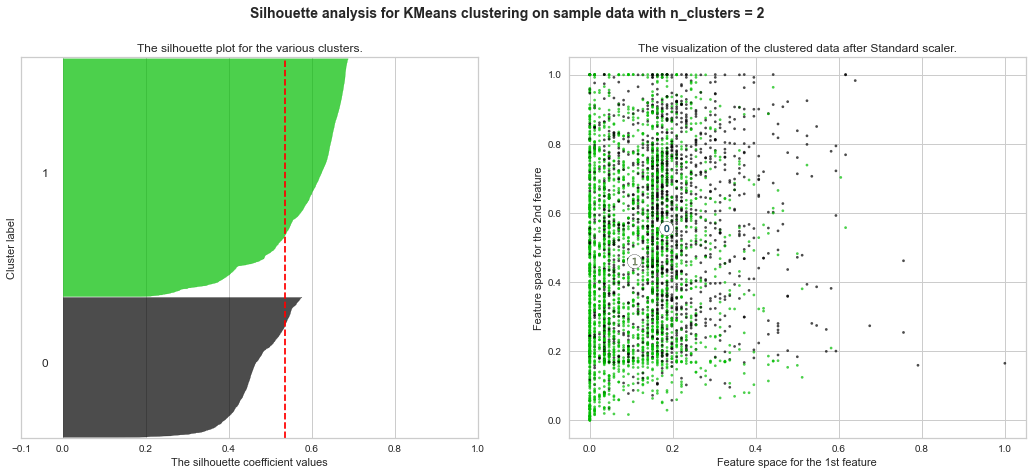

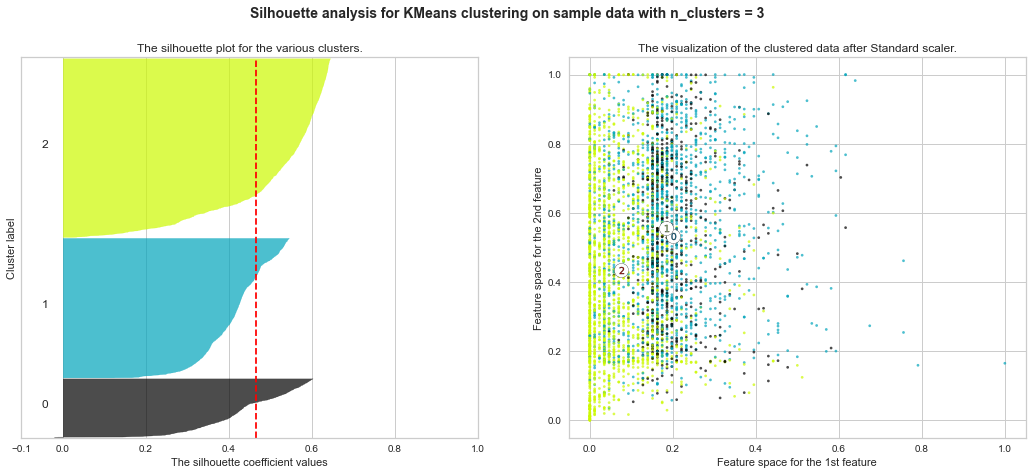

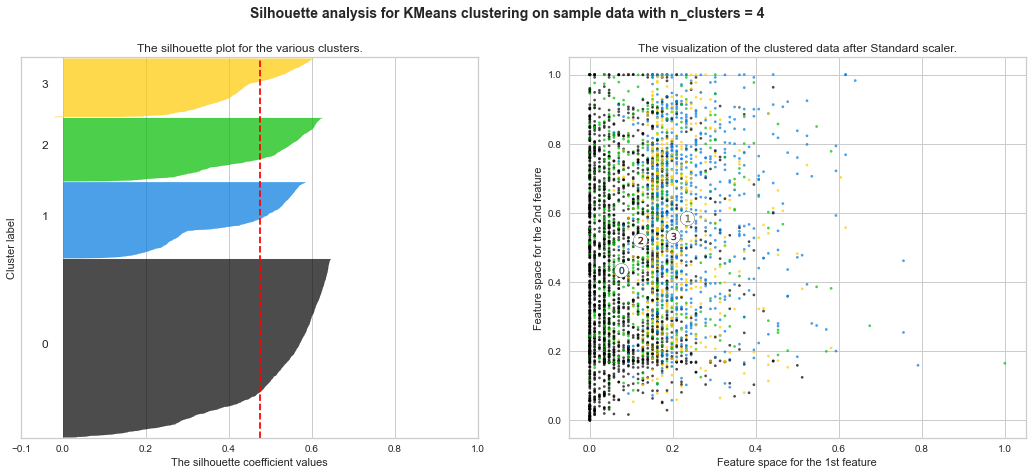

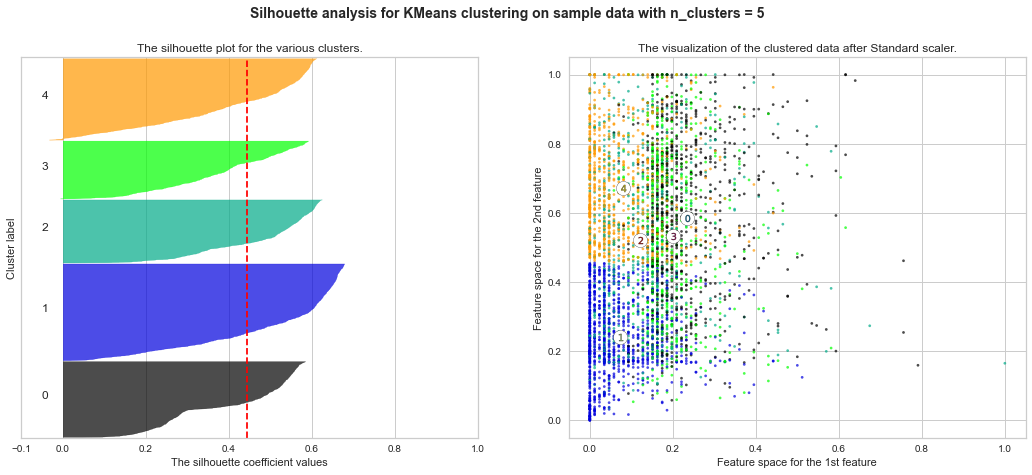

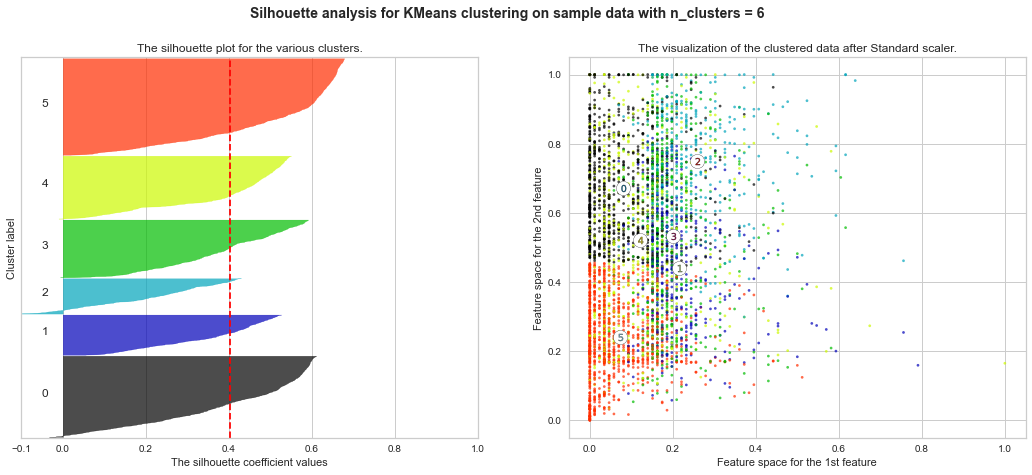

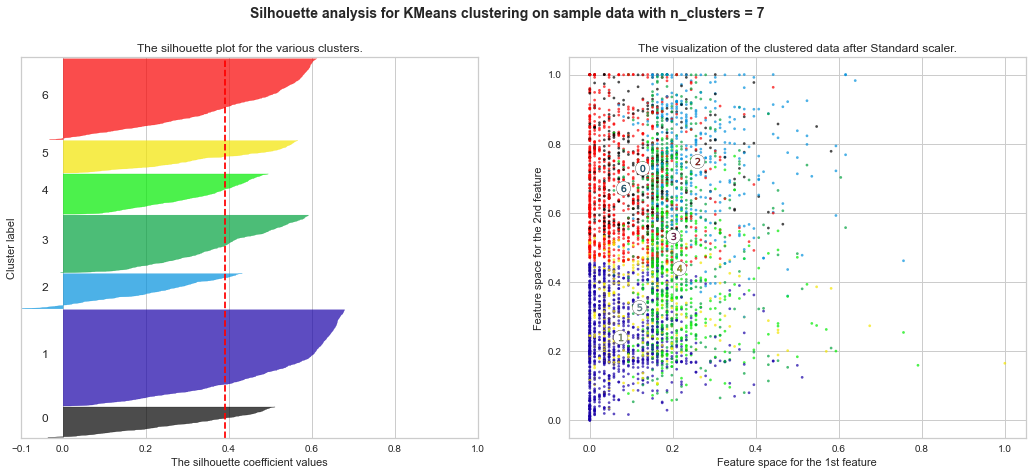

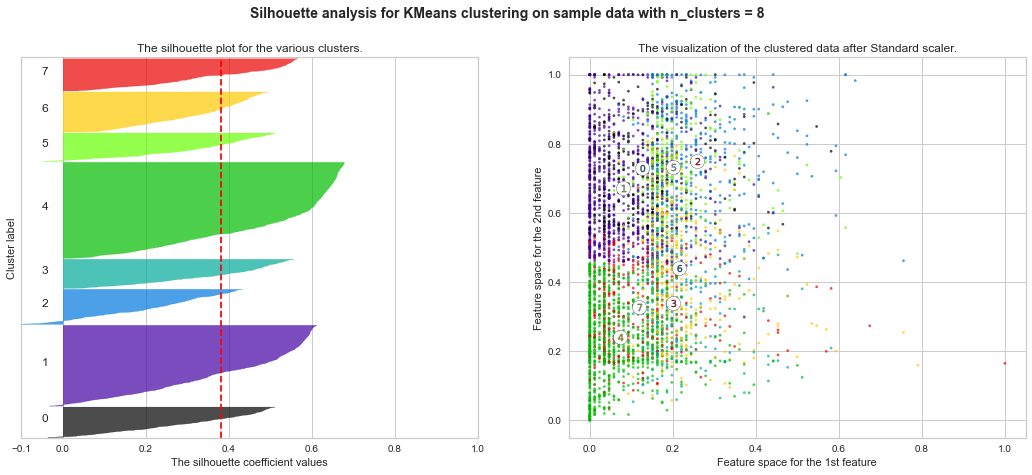

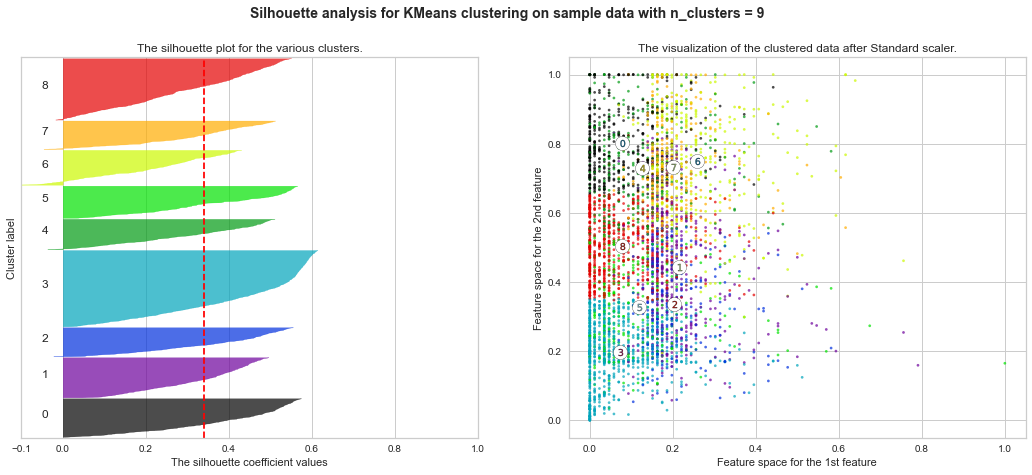

In [122]:
range_n_clusters = [2,3,4,5,6,7,8,9]
for n_clusters in range_n_clusters:
                                                         # Creating a subplot with 1 row & 2 columns:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
                                    # 1st subplot is Silhouette plot
                                    # Silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
        #(n_clusters+1)*10 is for inserting blank space between silhouet plots of individual clusters to demarcate them clearly
        
    ax1.set_ylim([0, len(minmax_df) + (n_clusters + 1) * 10])

                                                        # Initialize the clusterer with n_clusters value and a random generator
                                                        # seed of 10 for reproducibility.
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(minmax_df)

                                                        # The silhouette_score gives the average value for all the samples.
                                                        # This gives a perspective into the density and separation of the formed
                                                        # clusters
    silhouette_avg = sil(minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

                                                        # Compute the silhouette scores for each sample:
    sample_silhouette_values = silhouette_samples(minmax_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
                                # Aggregate the silhouette scores for samples belonging to
                                # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

                                                        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

                                   # Compute the new y_lower for next plot
        y_lower = y_upper + 10      # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values:
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks:
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed:
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(minmax_df[:,6], minmax_df[:,9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters:
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers:
    ax2.scatter(centers[:,6], centers[:,9], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Conclusion:**
According the the silhouette score of:

The MinMax Scaler Applied data, ideal number of clusters is 2, with a score higher than other options, of 0.53, but if you notice the number of cluster 5 has also the best variation within cluster and between cluster with zero to no values going towards -1 and no mismatch in cluster segregation than the consecutive rest

If we check silhouette score with Normalize data kmeans model 0.53>0.32. Best score always close to +1.

## Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset

In [123]:
# Good number of cluster found = 2
# Model building using cluster Numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(3999,)

In [124]:
y_predict_kmeans # These are nothing but cluster labels

array([1, 1, 1, ..., 0, 1, 1])

In [125]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [126]:
model_kmeans.cluster_centers_ # cluster centres associated with each lables

array([[5.69280197e-02, 2.15461508e-02, 4.15428764e-01, 7.76502363e-03,
        4.55773126e-03, 1.09621005e-01, 1.83518364e-01, 2.78255837e-02,
        4.90489598e-02, 5.57398375e-01, 1.00000000e+00],
       [3.50812450e-02, 7.85813260e-03, 1.76330421e-01, 6.94996029e-03,
        2.18427323e-03, 3.87875269e-02, 1.06313612e-01, 7.34309944e-03,
        1.23113582e-02, 4.60411394e-01, 5.49560397e-15]])

In [127]:
# within-cluster sum of squared
# lower values of inertia are better and zero is optimal.
# Inertia is sum of squared error for each cluster. 
# Therefore smaller the inertia, denser the cluster (closer together all the points are)

model_kmeans.inertia_

823.6756984125207

In [128]:
#Assign clusters to the data set:

flight_data['Kmeans_label'] = model_kmeans.labels_

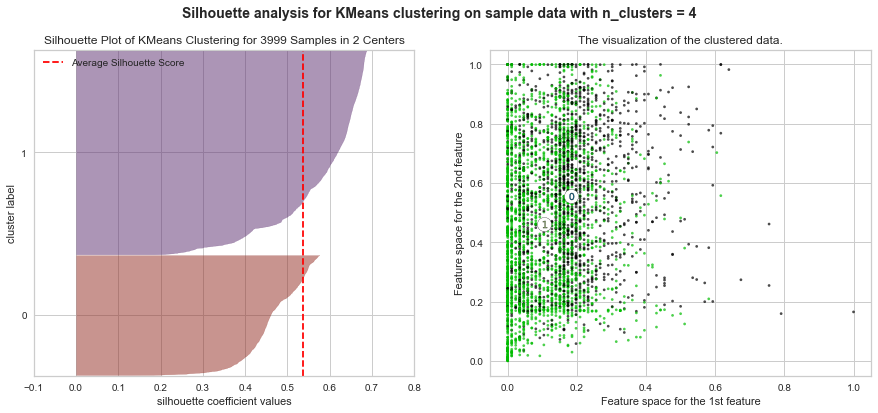

In [129]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)

sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(minmax_df)

# 2nd Plot showing the actual clusters formed:

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 2 is number of clusters
ax2.scatter(minmax_df[:, 6], minmax_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters:
centers1 = model_kmeans.cluster_centers_

# Draw white circles at cluster centers:
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

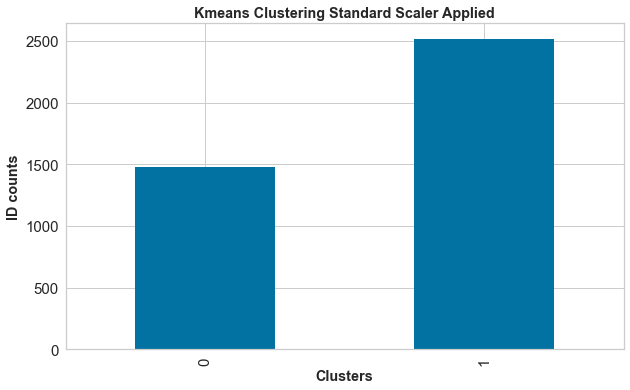

In [130]:
# Plotting barplot by using groupby method to get a visualization that how many row No. in each cluster:

fig, ax = plt.subplots(figsize=(10, 6))
flight_data.groupby(['Kmeans_label']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [131]:
# Group data by Clusters (K=2)

flight_data.groupby('Kmeans_label').agg(['mean'])

ID       Balance  Qual_miles cc1_miles cc2_miles  \
                     mean          mean        mean      mean      mean   
Kmeans_label                                                              
0             1745.592843  97053.051317  240.196489  2.661715  1.01553    
1             2173.169182  59807.839555  87.602462   1.705322  1.01390    

             cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo  \
                  mean          mean        mean              mean   
Kmeans_label                                                         
0             1.018231  28905.414585  15.782579   857.501013         
1             1.008737  10227.689039  9.142971    226.292295         

             Flight_trans_12 Days_since_enroll Award  
                        mean              mean  mean  
Kmeans_label                                          
0             2.599595        4625.062120       1.0   
1             0.652502        3820.652105       0.0

### Conclusion:

We can now clearly see the 2 number of clusters formed, which can be described as under

Cluster 1, Tier 1 = "1" = Defines the group of fliers that earn the most out of the card and are frequent fliers

Cluster 0, Tier 2 = "0" = Defines the group of fliers that earn the least and are the least frequent fliers